#  Laboratorio 7
# Predicción de Diabetes con AutoGluom
- Javier Prado 21496
- Luis Pedro Monterroso 21699

# Carga del conjunto de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math


In [2]:
data = pd.read_csv('diabetes.csv')
df = pd.DataFrame(data)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()
print(df.shape)
print(df.dtypes.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
(768, 9)
int64      7
float64    2
Name: count, dtype: int64


In [4]:
# duplicated values
print("Duplicados:", df.duplicated().sum())

Duplicados: 0


In [5]:
# revisión y descripción de los datos
print(df.describe().T)
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Columnas numéricas:", num_cols)
cat_cols = df.select_dtypes(include='object').columns.tolist()
print("Columnas categóricas:", cat_cols)

                          count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinT

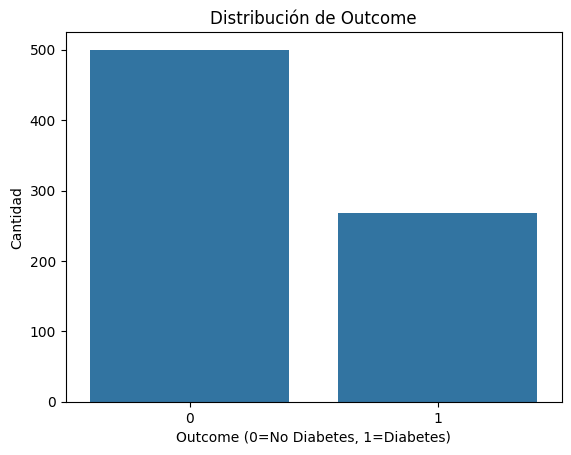

In [6]:
# grafico outcomne
if "Outcome" in df.columns:
    sns.countplot(x="Outcome", data=df)
    plt.title("Distribución de Outcome")
    plt.xlabel("Outcome (0=No Diabetes, 1=Diabetes)")
    plt.ylabel("Cantidad")
    plt.show()

# Explicacion concepto Outcome
Outcome es la etiqueta binaria del conjunto de datos: indica si la persona presenta diabetes (1) o no presenta diabetes (0) de acuerdo con el criterio clínico usado para construir el dataset (p. ej., diagnóstico basado en pruebas de glucosa como la prueba de tolerancia oral; típicamente, valores elevados y/o criterios establecidos por guías clínicas). Esta columna es el objetivo (target) que intentaremos predecir a partir de los demás predictores (glucosa, presión diastólica, IMC, insulina, edad, etc.).


# 2. Análisis Exploratorio de Datos (EDA):
Obtenga estadísticas descriptivas básicas del conjunto de datos.

In [7]:
# Estadísticas descriptivas completas
print("=== INFORMACIÓN BÁSICA DEL DATASET ===")
print(f"Forma del dataset: {df.shape}")
print(f"Columnas: {list(df.columns)}")
print(f"Tipos de datos:")
print(df.dtypes)
print("\n=== ESTADÍSTICAS DESCRIPTIVAS ===")
print(df.describe().round(2))

# Información adicional
print("\n=== INFORMACIÓN ADICIONAL ===")
print("Valores únicos por columna:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} valores únicos")
    
print(f"\nDuplicados: {df.duplicated().sum()}")
print(f"Memoria total utilizada: {df.memory_usage(deep=True).sum()/1024:.2f} KB")

=== INFORMACIÓN BÁSICA DEL DATASET ===
Forma del dataset: (768, 9)
Columnas: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
Tipos de datos:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

=== ESTADÍSTICAS DESCRIPTIVAS ===
       Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin     BMI  \
count       768.00   768.00         768.00         768.00   768.00  768.00   
mean          3.85   120.89          69.11          20.54    79.80   31.99   
std           3.37    31.97          19.36          15.95   115.24    7.88   
min           0.00     0.00           0.00           0.00     0.00    0.00   
25%           1.00 

In [8]:
if "Outcome" in df.columns:
    print("=== Distribución de Outcome ===")
    print(df["Outcome"].value_counts().rename({0:"No Diabetes (0)", 1:"Diabetes (1)"}))
    print(f"Prevalencia Outcome=1: {df['Outcome'].mean()*100:.2f}%\n")

=== Distribución de Outcome ===
Outcome
No Diabetes (0)    500
Diabetes (1)       268
Name: count, dtype: int64
Prevalencia Outcome=1: 34.90%



In [9]:
if "Outcome" in df.columns:
    num_cols = [c for c in df.columns if c != "Outcome" and pd.api.types.is_numeric_dtype(df[c])]
    stats_por_clase = df.groupby("Outcome")[num_cols].agg(["mean","std","median"]).round(2)
    print("=== Estadística por clase de Outcome (mean/std/median) ===")
    print(stats_por_clase)

=== Estadística por clase de Outcome (mean/std/median) ===
        Pregnancies              Glucose               BloodPressure         \
               mean   std median    mean    std median          mean    std   
Outcome                                                                       
0              3.30  3.02    2.0  109.98  26.14  107.0         68.18  18.06   
1              4.87  3.74    4.0  141.26  31.94  140.0         70.82  21.49   

               SkinThickness  ... Insulin    BMI               \
        median          mean  ...  median   mean   std median   
Outcome                       ...                               
0         70.0         19.66  ...    39.0  30.30  7.69  30.05   
1         74.0         22.16  ...     0.0  35.14  7.26  34.25   

        DiabetesPedigreeFunction                 Age                
                            mean   std median   mean    std median  
Outcome                                                             
0           

## Visualizacion de la distribución de las variables con histogramas y boxplots.

### Histogramas de distribución de variables

In [10]:
suspect_zero = {"Glucose","BloodPressure","Skin","Insulin","BMI"} & set(df.columns)
df[list(suspect_zero)] = df[list(suspect_zero)].replace(0, np.nan)

num_cols = [c for c in df.columns if c != "Outcome" and pd.api.types.is_numeric_dtype(df[c])]
print("Numéricas para graficar:", num_cols)

Numéricas para graficar: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


Variables numéricas a graficar: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


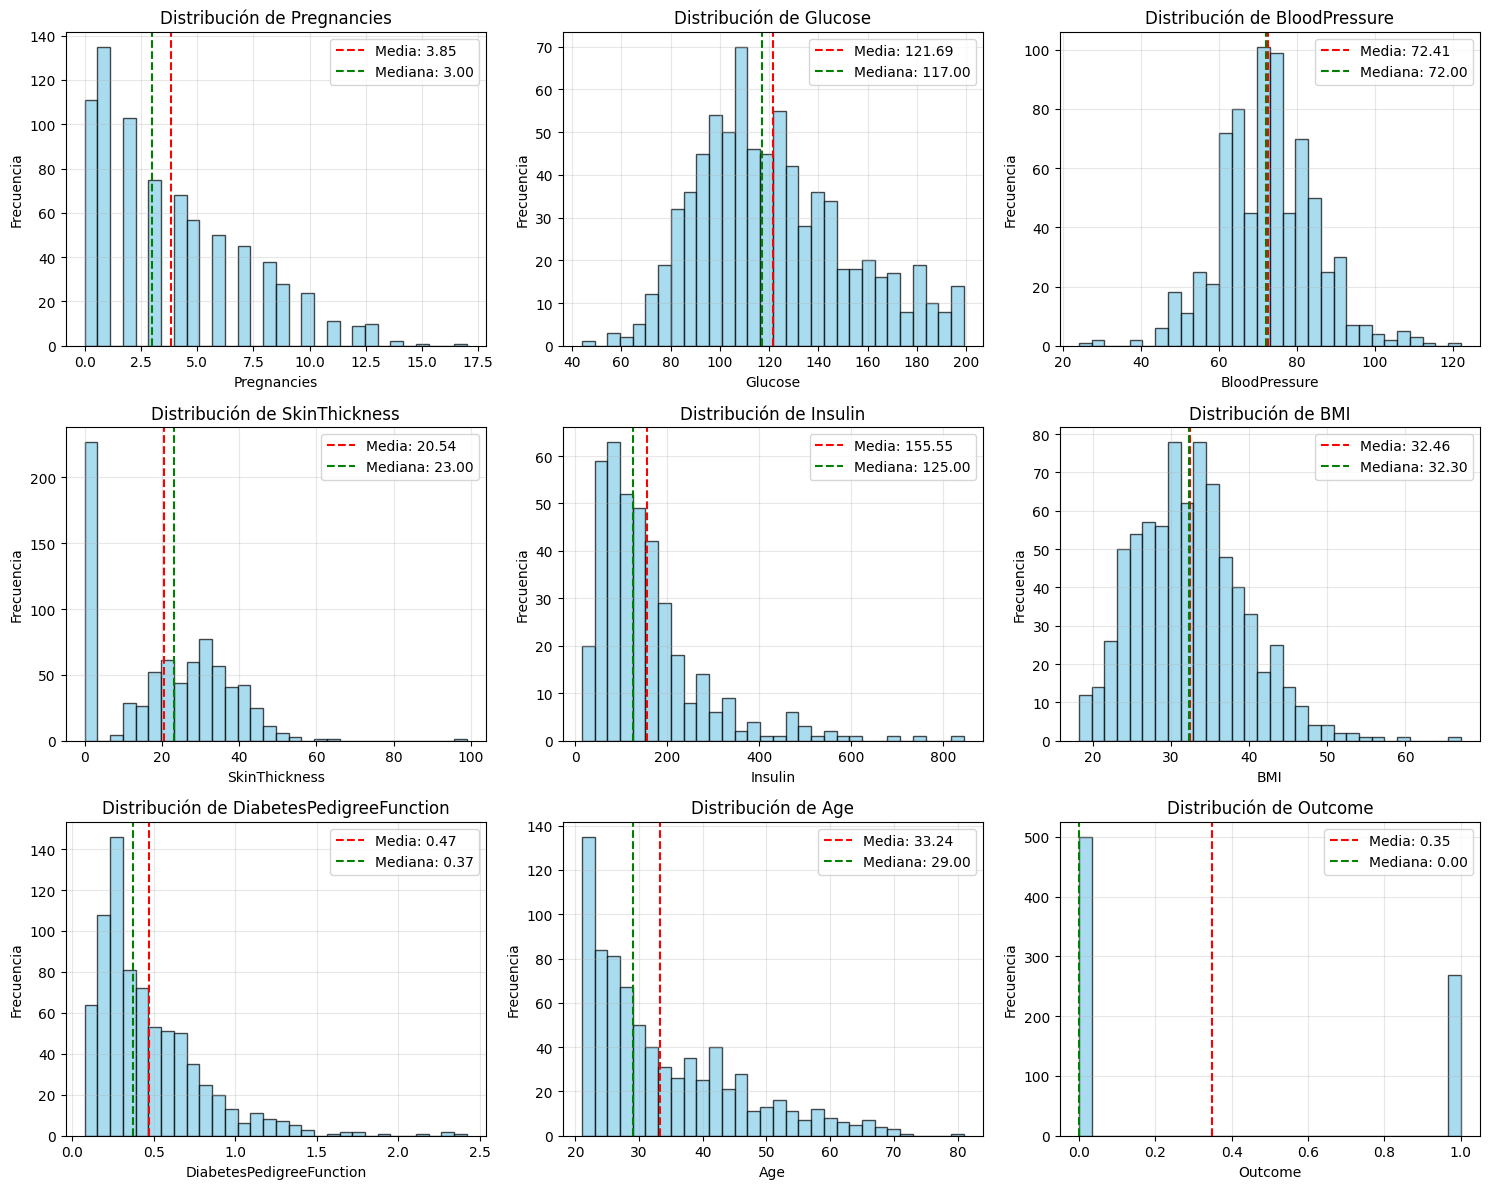

In [11]:
# Histogramas de todas las variables numéricas
num_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
print(f"Variables numéricas a graficar: {num_cols}")

# Configurar el grid de subplots
n_cols = len(num_cols)
n_rows = (n_cols + 2) // 3  # 3 columnas por fila
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 4*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 else axes

for i, col in enumerate(num_cols):
    ax = axes[i]
    # Histograma
    ax.hist(df[col].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribución de {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frecuencia')
    ax.grid(True, alpha=0.3)
    
    # Agregar estadísticas en el gráfico
    mean_val = df[col].mean()
    median_val = df[col].median()
    ax.axvline(mean_val, color='red', linestyle='--', label=f'Media: {mean_val:.2f}')
    ax.axvline(median_val, color='green', linestyle='--', label=f'Mediana: {median_val:.2f}')
    ax.legend()

# Ocultar subplots vacíos
for i in range(len(num_cols), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

### Boxplots para detectar valores atípicos

<Figure size 1500x800 with 0 Axes>

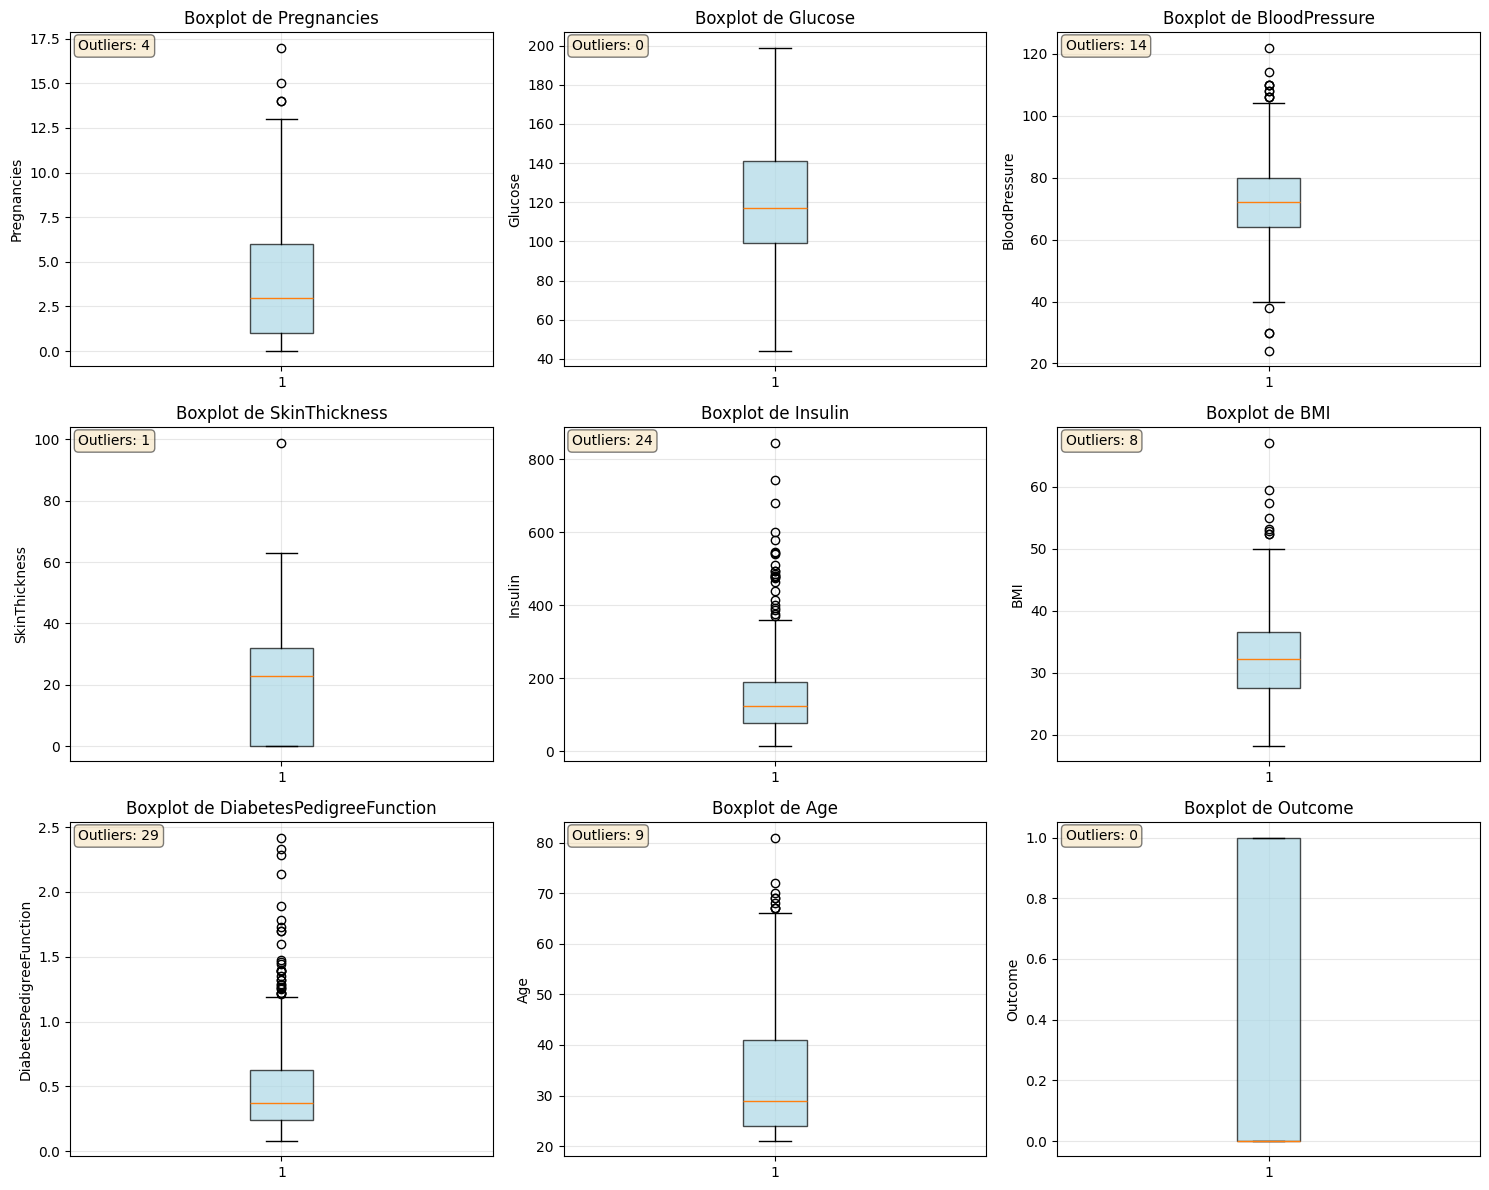

In [12]:
# Boxplots de todas las variables numéricas
plt.figure(figsize=(15, 8))

# Crear subplots para boxplots
n_cols = len(num_cols)
n_rows = (n_cols + 2) // 3
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 4*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 else axes

for i, col in enumerate(num_cols):
    ax = axes[i]
    box_plot = ax.boxplot(df[col].dropna(), patch_artist=True, 
                         boxprops=dict(facecolor='lightblue', alpha=0.7))
    ax.set_title(f'Boxplot de {col}')
    ax.set_ylabel(col)
    ax.grid(True, alpha=0.3)
    
    # Agregar estadísticas
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    outliers = df[(df[col] < q1 - 1.5*iqr) | (df[col] > q3 + 1.5*iqr)][col]
    ax.text(0.02, 0.98, f'Outliers: {len(outliers)}', transform=ax.transAxes, 
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Ocultar subplots vacíos
for i in range(len(num_cols), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

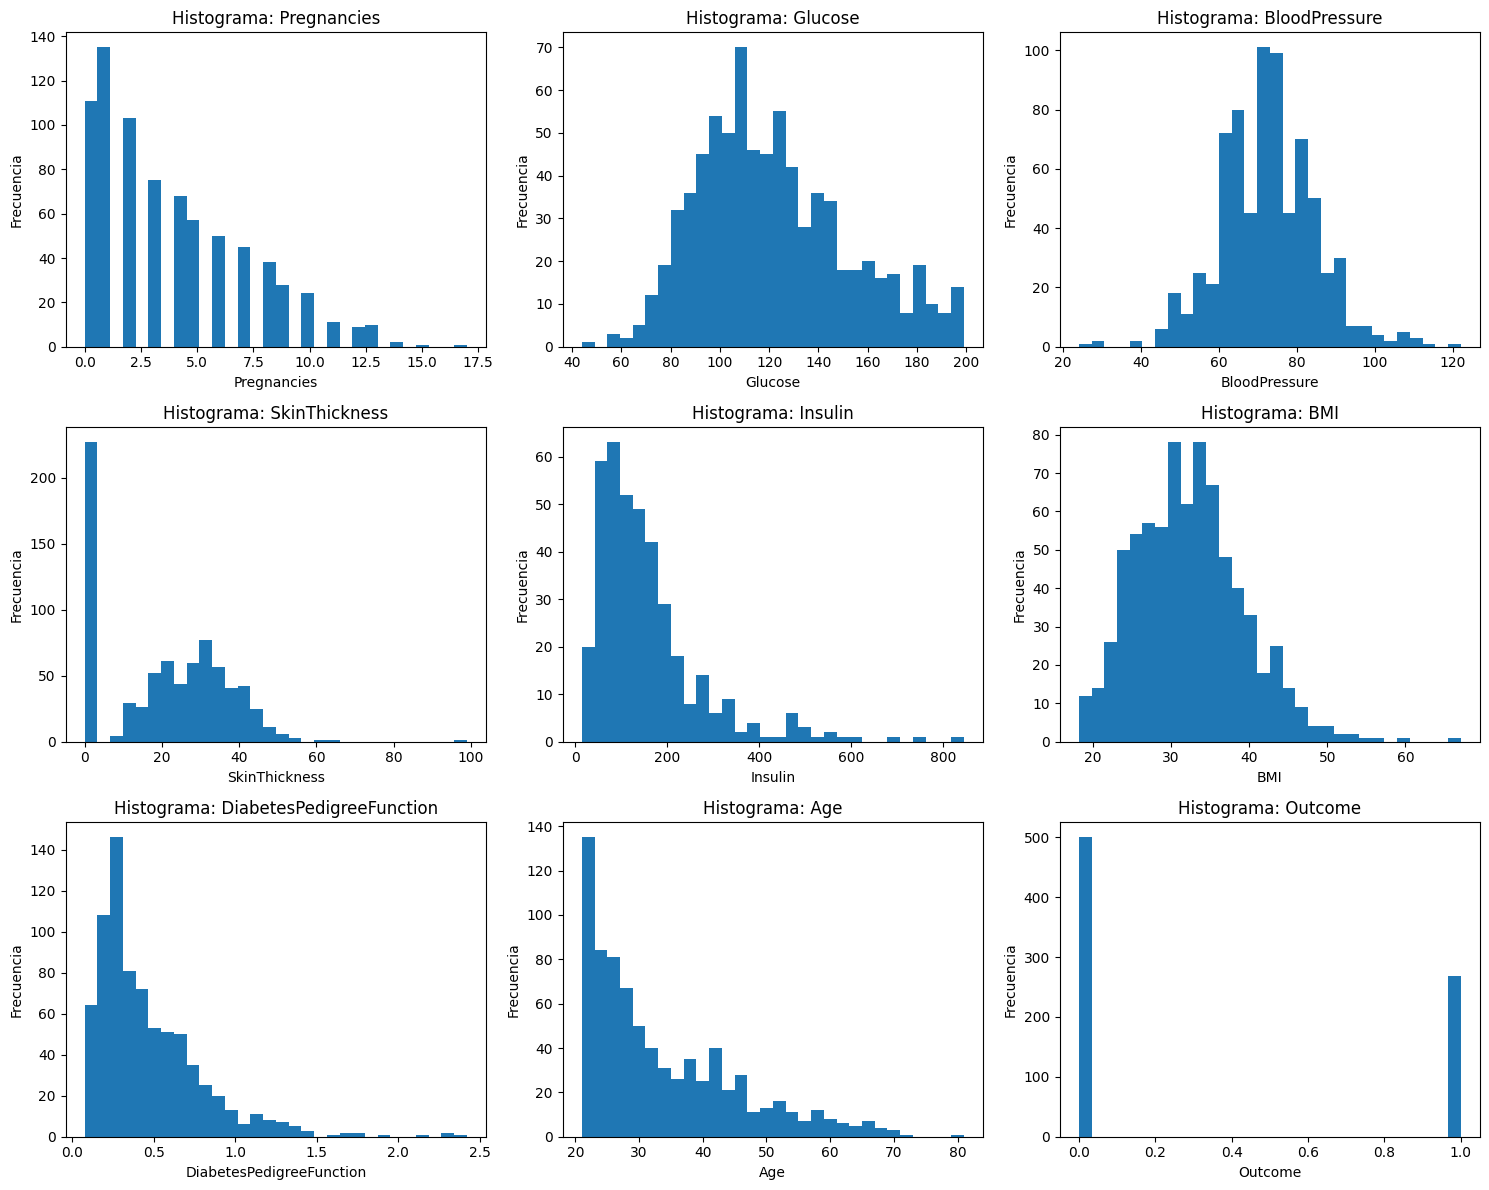

In [13]:
# histograma global
n = len(num_cols)
rows = math.ceil(n/3)
plt.figure(figsize=(15, 4*rows))

for i, c in enumerate(num_cols, 1):
    plt.subplot(rows, 3, i)
    plt.hist(df[c].dropna(), bins=30)
    plt.title(f"Histograma: {c}")
    plt.xlabel(c); plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

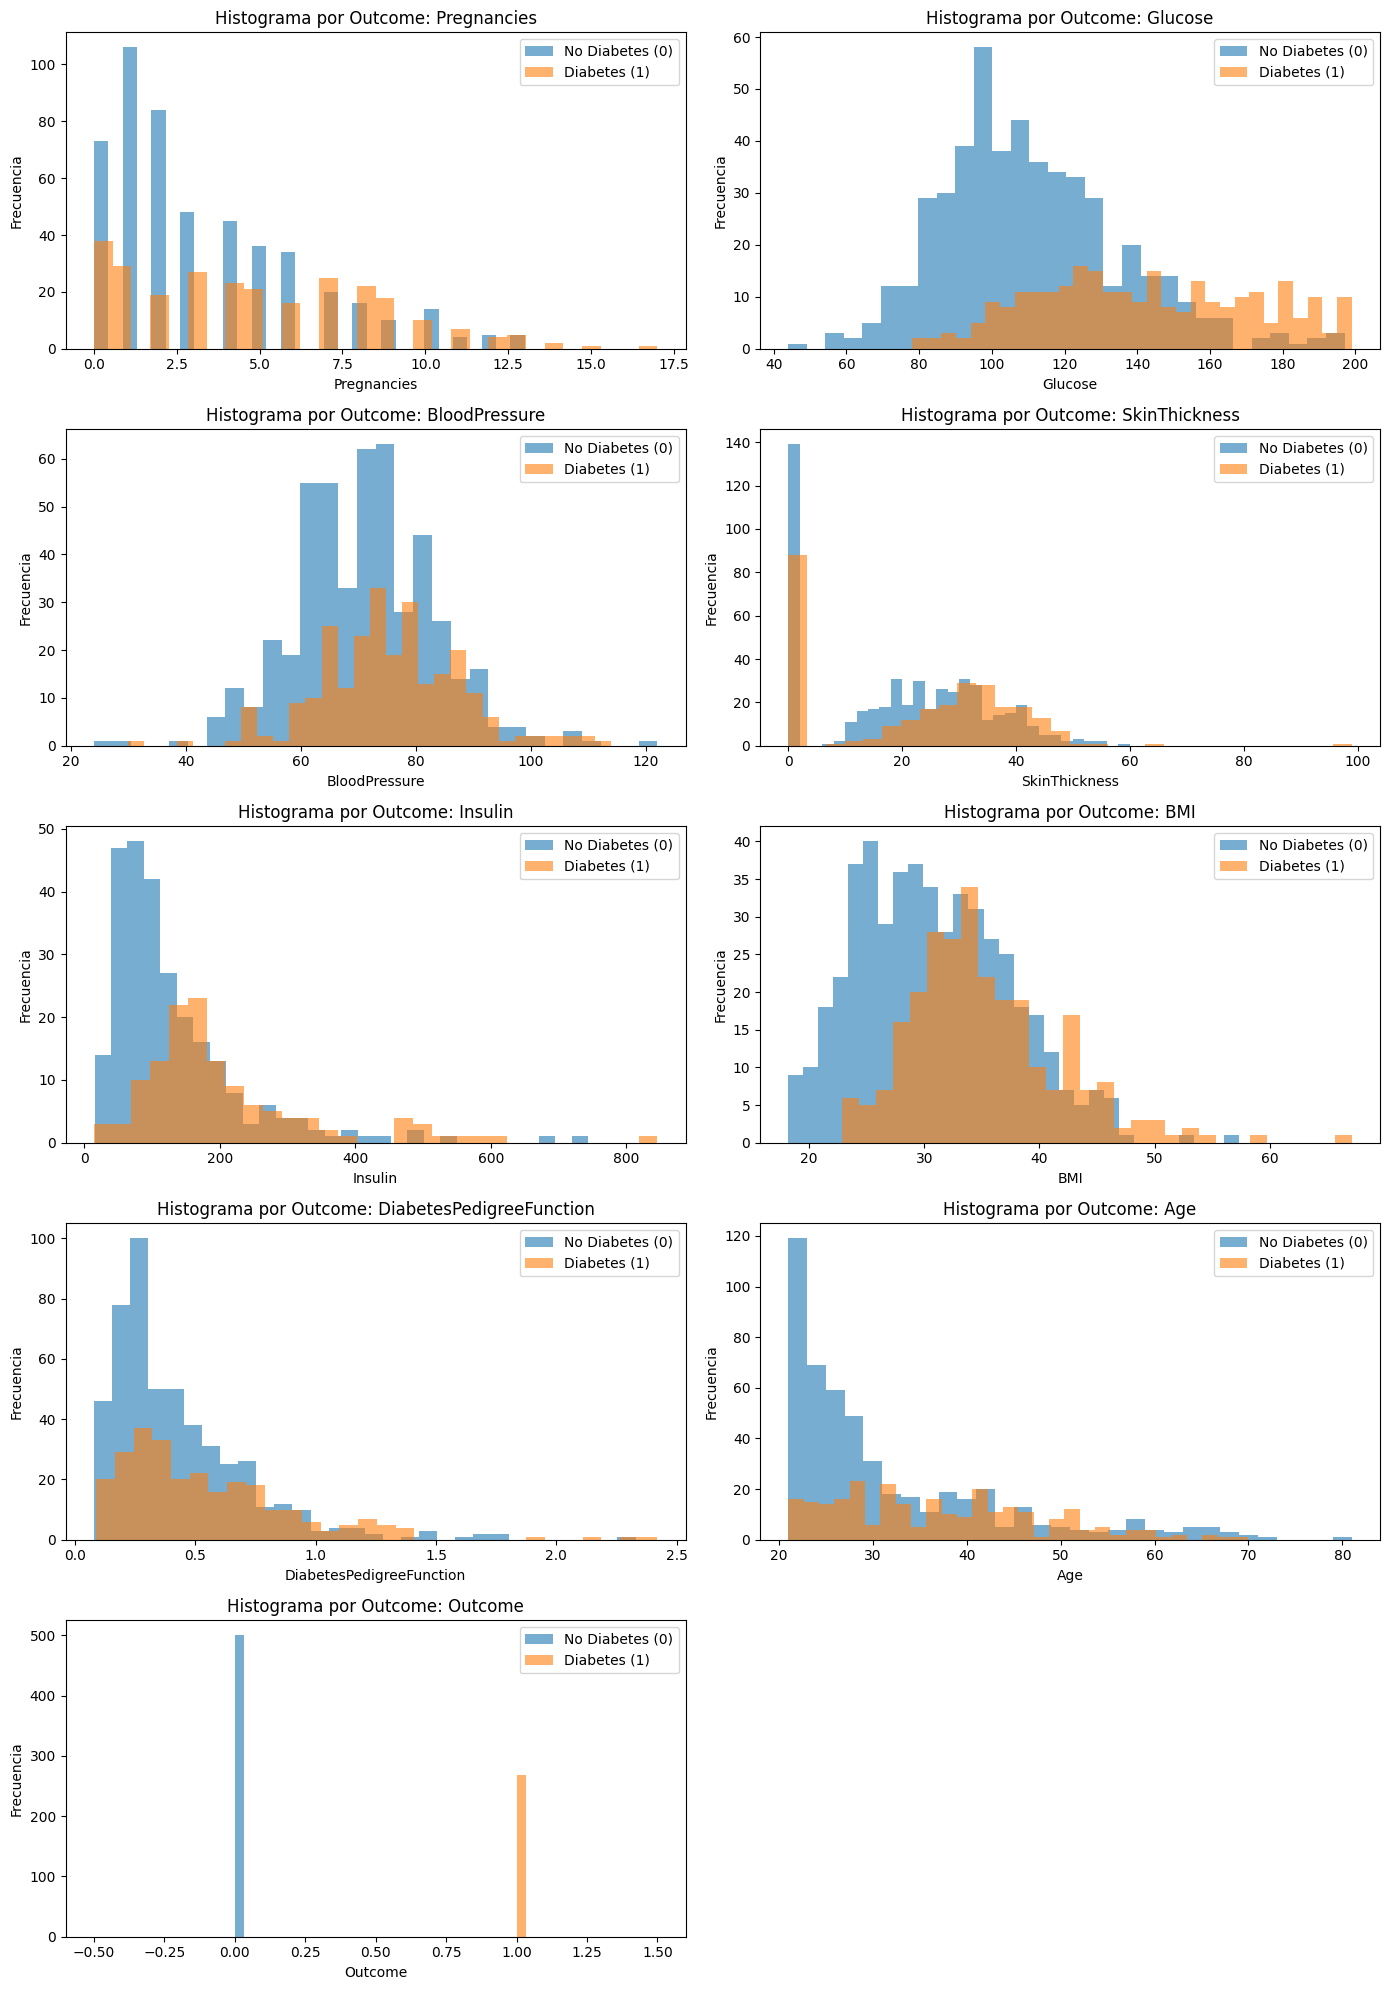

In [14]:
# === 2) Histogramas separados por Outcome (si existe) ===
if "Outcome" in df.columns:
    n = len(num_cols)
    rows = math.ceil(n/2)
    plt.figure(figsize=(14, 4*rows))

    for i, c in enumerate(num_cols, 1):
        plt.subplot(rows, 2, i)
        # hist por clase
        for val, label in [(0, "No Diabetes (0)"), (1, "Diabetes (1)")]:
            subset = df.loc[df["Outcome"]==val, c].dropna()
            plt.hist(subset, bins=30, alpha=0.6, label=label)
        plt.title(f"Histograma por Outcome: {c}")
        plt.xlabel(c); plt.ylabel("Frecuencia")
        plt.legend()

    plt.tight_layout()
    plt.show()

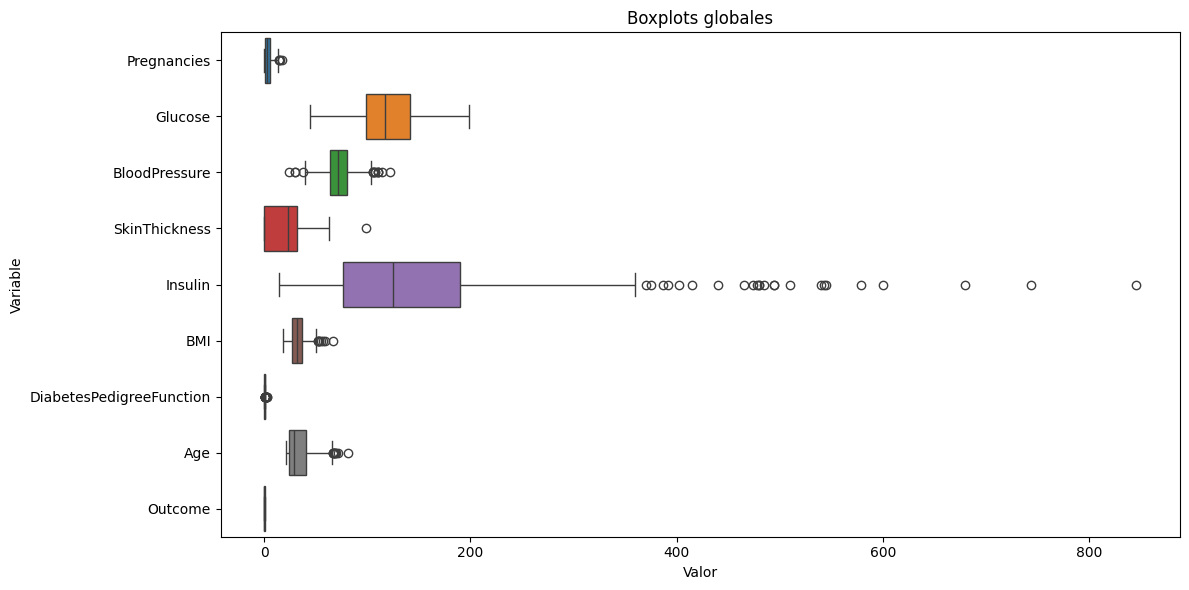

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_cols], orient="h")
plt.title("Boxplots globales")
plt.xlabel("Valor")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

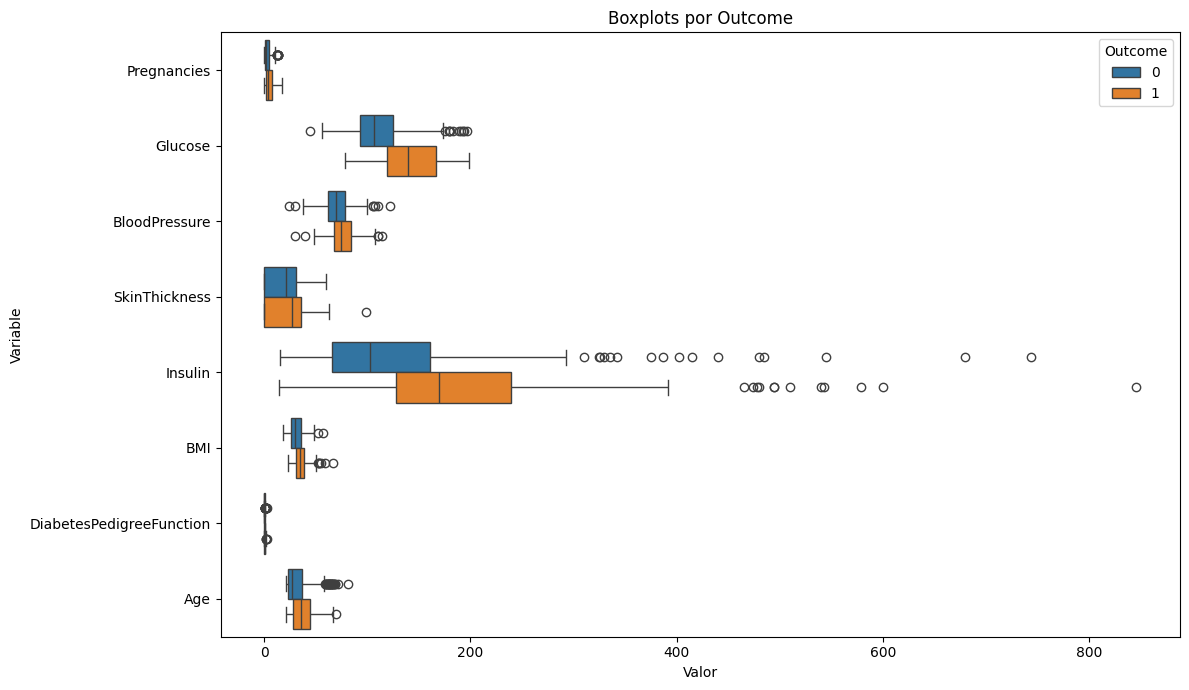

In [16]:
# === 4) Boxplots por Outcome ===
if "Outcome" in df.columns:
    # Reestructurar a formato largo para un solo gráfico
    long_df = df.melt(id_vars="Outcome", value_vars=num_cols, var_name="Variable", value_name="Valor")
    plt.figure(figsize=(12, 7))
    sns.boxplot(data=long_df, x="Valor", y="Variable", hue="Outcome")
    plt.title("Boxplots por Outcome")
    plt.tight_layout()
    plt.show()

=== 1) ANÁLISIS DE VALORES NULOS ===
Total de valores nulos en el dataset: 425
Porcentaje de datos faltantes: 6.15%

Valores nulos por columna:
Insulin: 374 (48.70%)
BloodPressure: 35 (4.56%)
BMI: 11 (1.43%)
Glucose: 5 (0.65%)

=== 2) ORIGEN DE LOS VALORES NULOS ===
Estos valores nulos probablemente provienen de:
- Ceros imposibles en variables fisiológicas que fueron convertidos a NaN
- Variables como Glucose, BloodPressure, SkinThickness, Insulin, BMI no pueden ser 0

=== 3) PATRONES DE VALORES FALTANTES ===


<Figure size 1200x600 with 0 Axes>

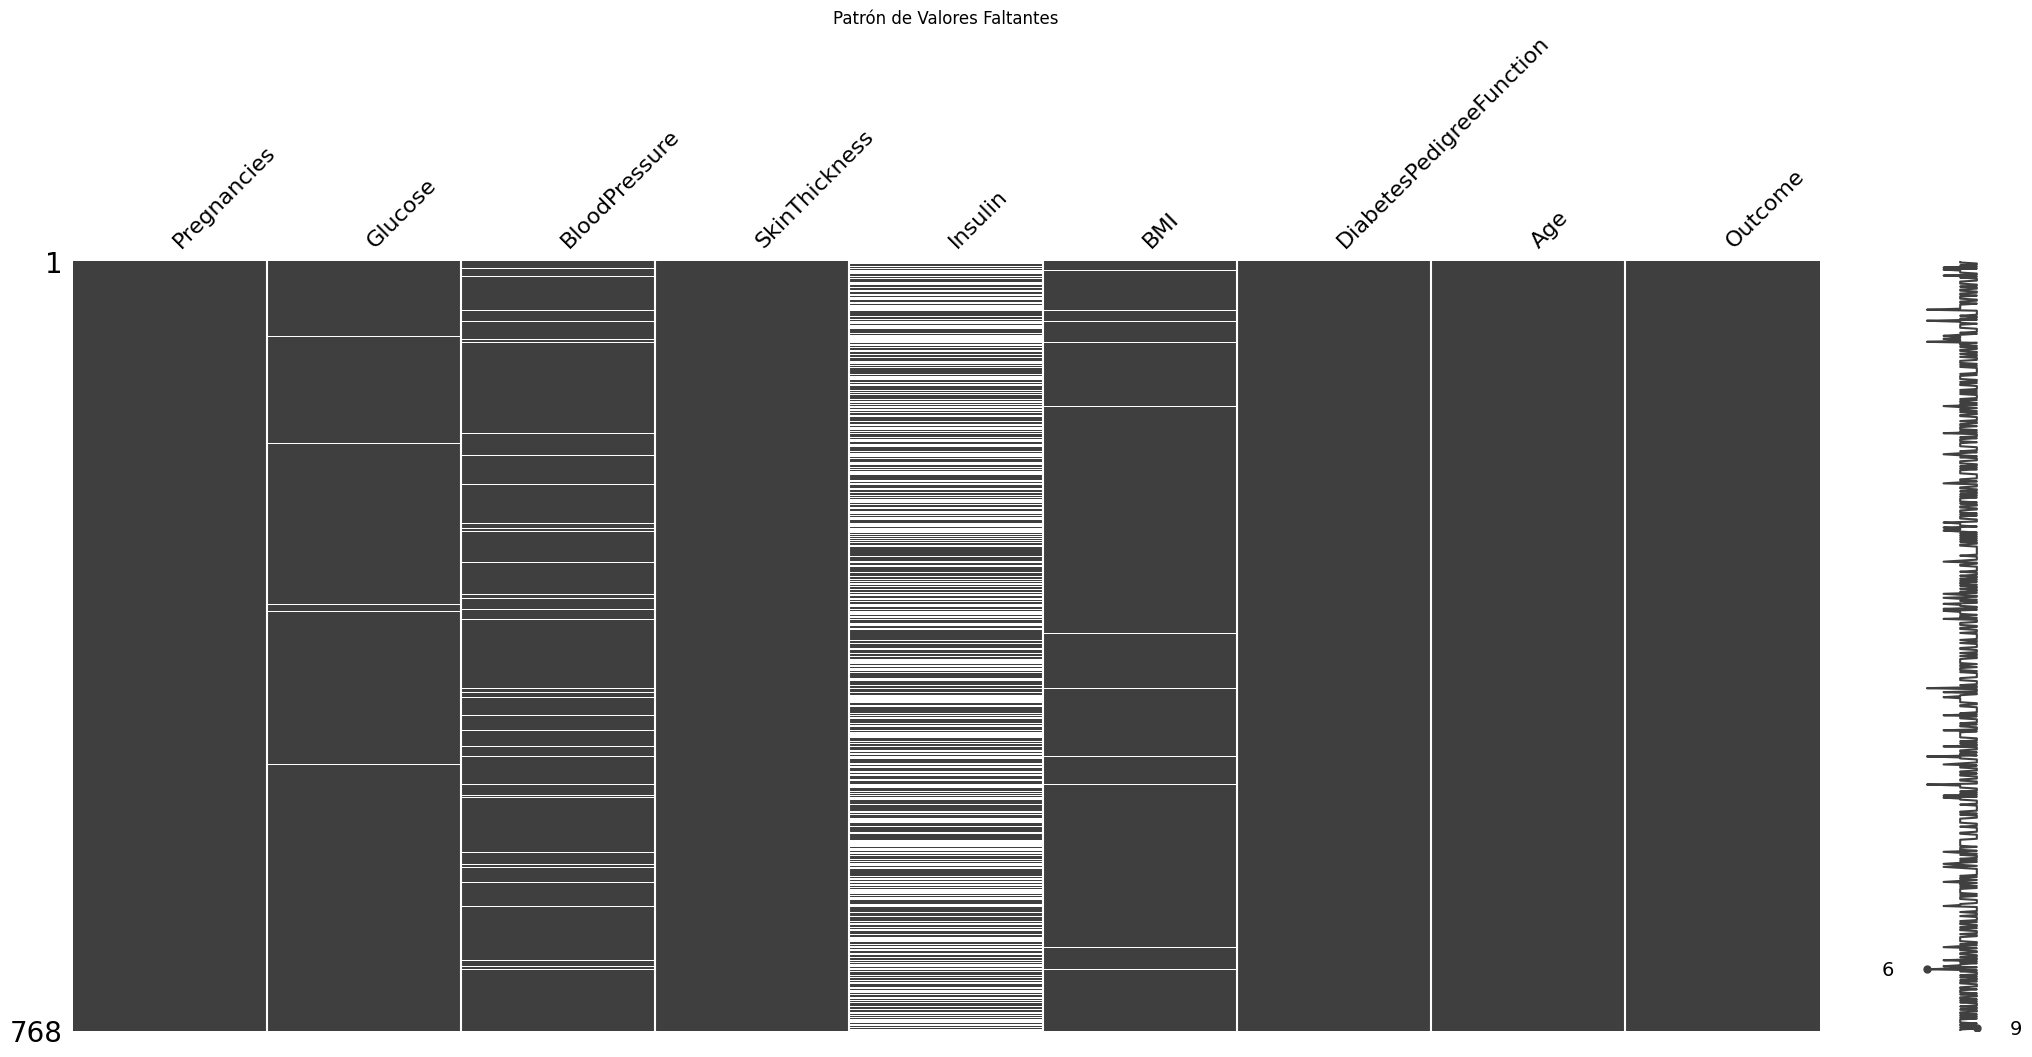


Correlación entre patrones de valores faltantes:
                          Pregnancies  Glucose  BloodPressure  SkinThickness  \
Pregnancies                       NaN      NaN            NaN            NaN   
Glucose                           NaN     1.00          -0.02            NaN   
BloodPressure                     NaN    -0.02           1.00            NaN   
SkinThickness                     NaN      NaN            NaN            NaN   
Insulin                           NaN     0.05           0.22            NaN   
BMI                               NaN    -0.01           0.34            NaN   
DiabetesPedigreeFunction          NaN      NaN            NaN            NaN   
Age                               NaN      NaN            NaN            NaN   
Outcome                           NaN      NaN            NaN            NaN   

                          Insulin   BMI  DiabetesPedigreeFunction  Age  \
Pregnancies                   NaN   NaN                       NaN  NaN   
G

In [17]:
# === ANÁLISIS COMPLETO DE VALORES NULOS Y ATÍPICOS ===

print("=== 1) ANÁLISIS DE VALORES NULOS ===")
print(f"Total de valores nulos en el dataset: {df.isna().sum().sum()}")
print(f"Porcentaje de datos faltantes: {(df.isna().sum().sum() / (df.shape[0] * df.shape[1])) * 100:.2f}%")
print("\nValores nulos por columna:")
nulos_por_columna = df.isna().sum().sort_values(ascending=False)
for col, nulos in nulos_por_columna.items():
    if nulos > 0:
        porcentaje = (nulos / len(df)) * 100
        print(f"{col}: {nulos} ({porcentaje:.2f}%)")

print("\n=== 2) ORIGEN DE LOS VALORES NULOS ===")
print("Estos valores nulos probablemente provienen de:")
print("- Ceros imposibles en variables fisiológicas que fueron convertidos a NaN")
print("- Variables como Glucose, BloodPressure, SkinThickness, Insulin, BMI no pueden ser 0")

# Verificar patrones de valores nulos
print("\n=== 3) PATRONES DE VALORES FALTANTES ===")
import missingno as msno

try:
    plt.figure(figsize=(12, 6))
    msno.matrix(df)
    plt.title("Patrón de Valores Faltantes")
    plt.show()
except:
    print("Librería missingno no disponible, usando análisis alternativo")
    
# Análisis de correlación entre valores faltantes
print("\nCorrelación entre patrones de valores faltantes:")
missing_df = df.isna().astype(int)
correlation_missing = missing_df.corr()
print(correlation_missing.round(2))

In [18]:
# === 4) ANÁLISIS DE OUTLIERS ===
print("=== ANÁLISIS DE VALORES ATÍPICOS ===")

def detectar_outliers_iqr(df, columna):
    """Detecta outliers usando el método IQR"""
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
    return outliers, limite_inferior, limite_superior

# Analizar outliers para cada variable numérica
outliers_info = {}
for col in df.select_dtypes(include=[np.number]).columns:
    outliers, lim_inf, lim_sup = detectar_outliers_iqr(df, col)
    outliers_info[col] = {
        'count': len(outliers),
        'percentage': (len(outliers) / len(df)) * 100,
        'limits': (lim_inf, lim_sup)
    }
    print(f"\n{col}:")
    print(f"  - Outliers: {len(outliers)} ({(len(outliers) / len(df)) * 100:.2f}%)")
    print(f"  - Rango normal: [{lim_inf:.2f}, {lim_sup:.2f}]")
    if len(outliers) > 0:
        print(f"  - Valores extremos: min={outliers[col].min():.2f}, max={outliers[col].max():.2f}")

# Resumen de outliers
total_outliers = sum([info['count'] for info in outliers_info.values()])
print(f"\n=== RESUMEN DE OUTLIERS ===")
print(f"Total de observaciones con outliers: {total_outliers}")
print(f"Variables con más outliers:")
sorted_outliers = sorted(outliers_info.items(), key=lambda x: x[1]['count'], reverse=True)
for col, info in sorted_outliers[:5]:
    print(f"  - {col}: {info['count']} ({info['percentage']:.2f}%)")

=== ANÁLISIS DE VALORES ATÍPICOS ===

Pregnancies:
  - Outliers: 4 (0.52%)
  - Rango normal: [-6.50, 13.50]
  - Valores extremos: min=14.00, max=17.00

Glucose:
  - Outliers: 0 (0.00%)
  - Rango normal: [36.00, 204.00]

BloodPressure:
  - Outliers: 14 (1.82%)
  - Rango normal: [40.00, 104.00]
  - Valores extremos: min=24.00, max=122.00

SkinThickness:
  - Outliers: 1 (0.13%)
  - Rango normal: [-48.00, 80.00]
  - Valores extremos: min=99.00, max=99.00

Insulin:
  - Outliers: 24 (3.12%)
  - Rango normal: [-94.38, 360.62]
  - Valores extremos: min=370.00, max=846.00

BMI:
  - Outliers: 8 (1.04%)
  - Rango normal: [13.85, 50.25]
  - Valores extremos: min=52.30, max=67.10

DiabetesPedigreeFunction:
  - Outliers: 29 (3.78%)
  - Rango normal: [-0.33, 1.20]
  - Valores extremos: min=1.21, max=2.42

Age:
  - Outliers: 9 (1.17%)
  - Rango normal: [-1.50, 66.50]
  - Valores extremos: min=67.00, max=81.00

Outcome:
  - Outliers: 0 (0.00%)
  - Rango normal: [-1.50, 2.50]

=== RESUMEN DE OUTLIERS ==

In [19]:
# === 5) ESTRATEGIAS DE MANEJO DE DATOS FALTANTES ===
print("=== ESTRATEGIAS RECOMENDADAS ===")
print("""
PARA VALORES NULOS:
1. Imputación por la mediana: Más robusta ante outliers
2. Imputación por la media: Para distribuciones normales
3. Imputación por moda: Para variables categóricas
4. Eliminación: Solo si el porcentaje es muy bajo (<5%)

PARA OUTLIERS:
1. Mantener: Si son valores válidos biológicamente
2. Winsorización: Limitar a percentiles 5 y 95
3. Transformación: Log, sqrt para reducir impacto
4. Eliminación: Solo casos extremos claramente erróneos
""")

# Implementar estrategia de imputación
print("=== APLICANDO ESTRATEGIA DE IMPUTACIÓN ===")
df_imputed = df.copy()

# Imputar con la mediana (más robusta ante outliers)
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    if df_imputed[col].isna().sum() > 0:
        median_val = df_imputed[col].median()
        df_imputed[col].fillna(median_val, inplace=True)
        print(f"{col}: {df[col].isna().sum()} valores nulos imputados con mediana = {median_val:.2f}")

print(f"\nValores nulos después de imputación: {df_imputed.isna().sum().sum()}")

# Mostrar comparación antes y después
print("\n=== COMPARACIÓN ANTES Y DESPUÉS DE IMPUTACIÓN ===")
comparison = pd.DataFrame({
    'Antes_Nulos': df.isna().sum(),
    'Después_Nulos': df_imputed.isna().sum(),
    'Media_Antes': df.mean().round(2),
    'Media_Después': df_imputed.mean().round(2)
})
print(comparison[comparison['Antes_Nulos'] > 0])

=== ESTRATEGIAS RECOMENDADAS ===

PARA VALORES NULOS:
1. Imputación por la mediana: Más robusta ante outliers
2. Imputación por la media: Para distribuciones normales
3. Imputación por moda: Para variables categóricas
4. Eliminación: Solo si el porcentaje es muy bajo (<5%)

PARA OUTLIERS:
1. Mantener: Si son valores válidos biológicamente
2. Winsorización: Limitar a percentiles 5 y 95
3. Transformación: Log, sqrt para reducir impacto
4. Eliminación: Solo casos extremos claramente erróneos

=== APLICANDO ESTRATEGIA DE IMPUTACIÓN ===
Glucose: 5 valores nulos imputados con mediana = 117.00
BloodPressure: 35 valores nulos imputados con mediana = 72.00
Insulin: 374 valores nulos imputados con mediana = 125.00
BMI: 11 valores nulos imputados con mediana = 32.30

Valores nulos después de imputación: 0

=== COMPARACIÓN ANTES Y DESPUÉS DE IMPUTACIÓN ===
               Antes_Nulos  Después_Nulos  Media_Antes  Media_Después
Glucose                  5              0       121.69         121.66
Blo

C:\Users\javil\AppData\Local\Temp\ipykernel_13044\467924454.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputed[col].fillna(median_val, inplace=True)
C:\Users\javil\AppData\Local\Temp\ipykernel_13044\467924454.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

### Análisis del Balance de Clases - Variable Outcome

=== DISTRIBUCIÓN DE LA VARIABLE OUTCOME ===
Conteo absoluto:
No Diabetes (0): 500
Diabetes (1): 268
Total: 768

Porcentajes:
No Diabetes (0): 65.10%
Diabetes (1): 34.90%

Ratio de desbalance (No Diabetes / Diabetes): 1.87:1
Estado del balance: LIGERAMENTE DESBALANCEADO


C:\Users\javil\AppData\Local\Temp\ipykernel_13044\1571381940.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Outcome', ax=axes[2], palette=['lightcoral', 'lightblue'])


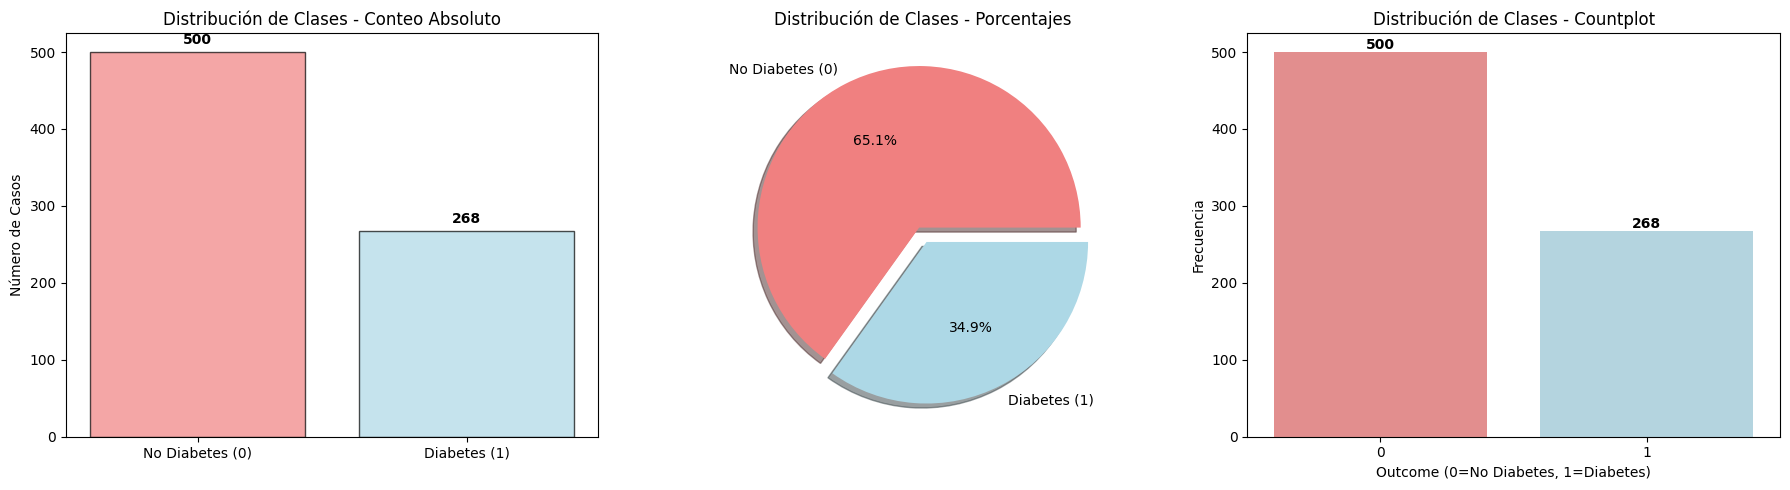

In [20]:
# === ANÁLISIS DEL BALANCE DE CLASES - OUTCOME ===

print("=== DISTRIBUCIÓN DE LA VARIABLE OUTCOME ===")

# Análisis básico
outcome_counts = df['Outcome'].value_counts().sort_index()
outcome_percentages = df['Outcome'].value_counts(normalize=True).sort_index() * 100

print("Conteo absoluto:")
print(f"No Diabetes (0): {outcome_counts[0]}")
print(f"Diabetes (1): {outcome_counts[1]}")
print(f"Total: {outcome_counts.sum()}")

print("\nPorcentajes:")
print(f"No Diabetes (0): {outcome_percentages[0]:.2f}%")
print(f"Diabetes (1): {outcome_percentages[1]:.2f}%")

# Ratio de desbalance
ratio = outcome_counts[0] / outcome_counts[1]
print(f"\nRatio de desbalance (No Diabetes / Diabetes): {ratio:.2f}:1")

# Clasificación del desbalance
if ratio <= 1.5:
    balance_status = "BALANCEADO"
elif ratio <= 3:
    balance_status = "LIGERAMENTE DESBALANCEADO"
elif ratio <= 10:
    balance_status = "MODERADAMENTE DESBALANCEADO"
else:
    balance_status = "SEVERAMENTE DESBALANCEADO"

print(f"Estado del balance: {balance_status}")

# Visualización del balance de clases
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Gráfico de barras
axes[0].bar(['No Diabetes (0)', 'Diabetes (1)'], outcome_counts.values, 
           color=['lightcoral', 'lightblue'], alpha=0.7, edgecolor='black')
axes[0].set_title('Distribución de Clases - Conteo Absoluto')
axes[0].set_ylabel('Número de Casos')
for i, v in enumerate(outcome_counts.values):
    axes[0].text(i, v + 10, str(v), ha='center', fontweight='bold')

# Gráfico de torta
axes[1].pie(outcome_counts.values, labels=['No Diabetes (0)', 'Diabetes (1)'], 
           autopct='%1.1f%%', colors=['lightcoral', 'lightblue'], 
           explode=(0.05, 0.05), shadow=True)
axes[1].set_title('Distribución de Clases - Porcentajes')

# Countplot con seaborn
sns.countplot(data=df, x='Outcome', ax=axes[2], palette=['lightcoral', 'lightblue'])
axes[2].set_title('Distribución de Clases - Countplot')
axes[2].set_xlabel('Outcome (0=No Diabetes, 1=Diabetes)')
axes[2].set_ylabel('Frecuencia')
# Agregar etiquetas en las barras
for i, p in enumerate(axes[2].patches):
    axes[2].annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width()/2., p.get_height()), 
                    ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

### Matriz de Correlación y Mapa de Calor

=== MATRIZ DE CORRELACIÓN ===
Matriz de correlación calculada exitosamente
Dimensiones: (9, 9)


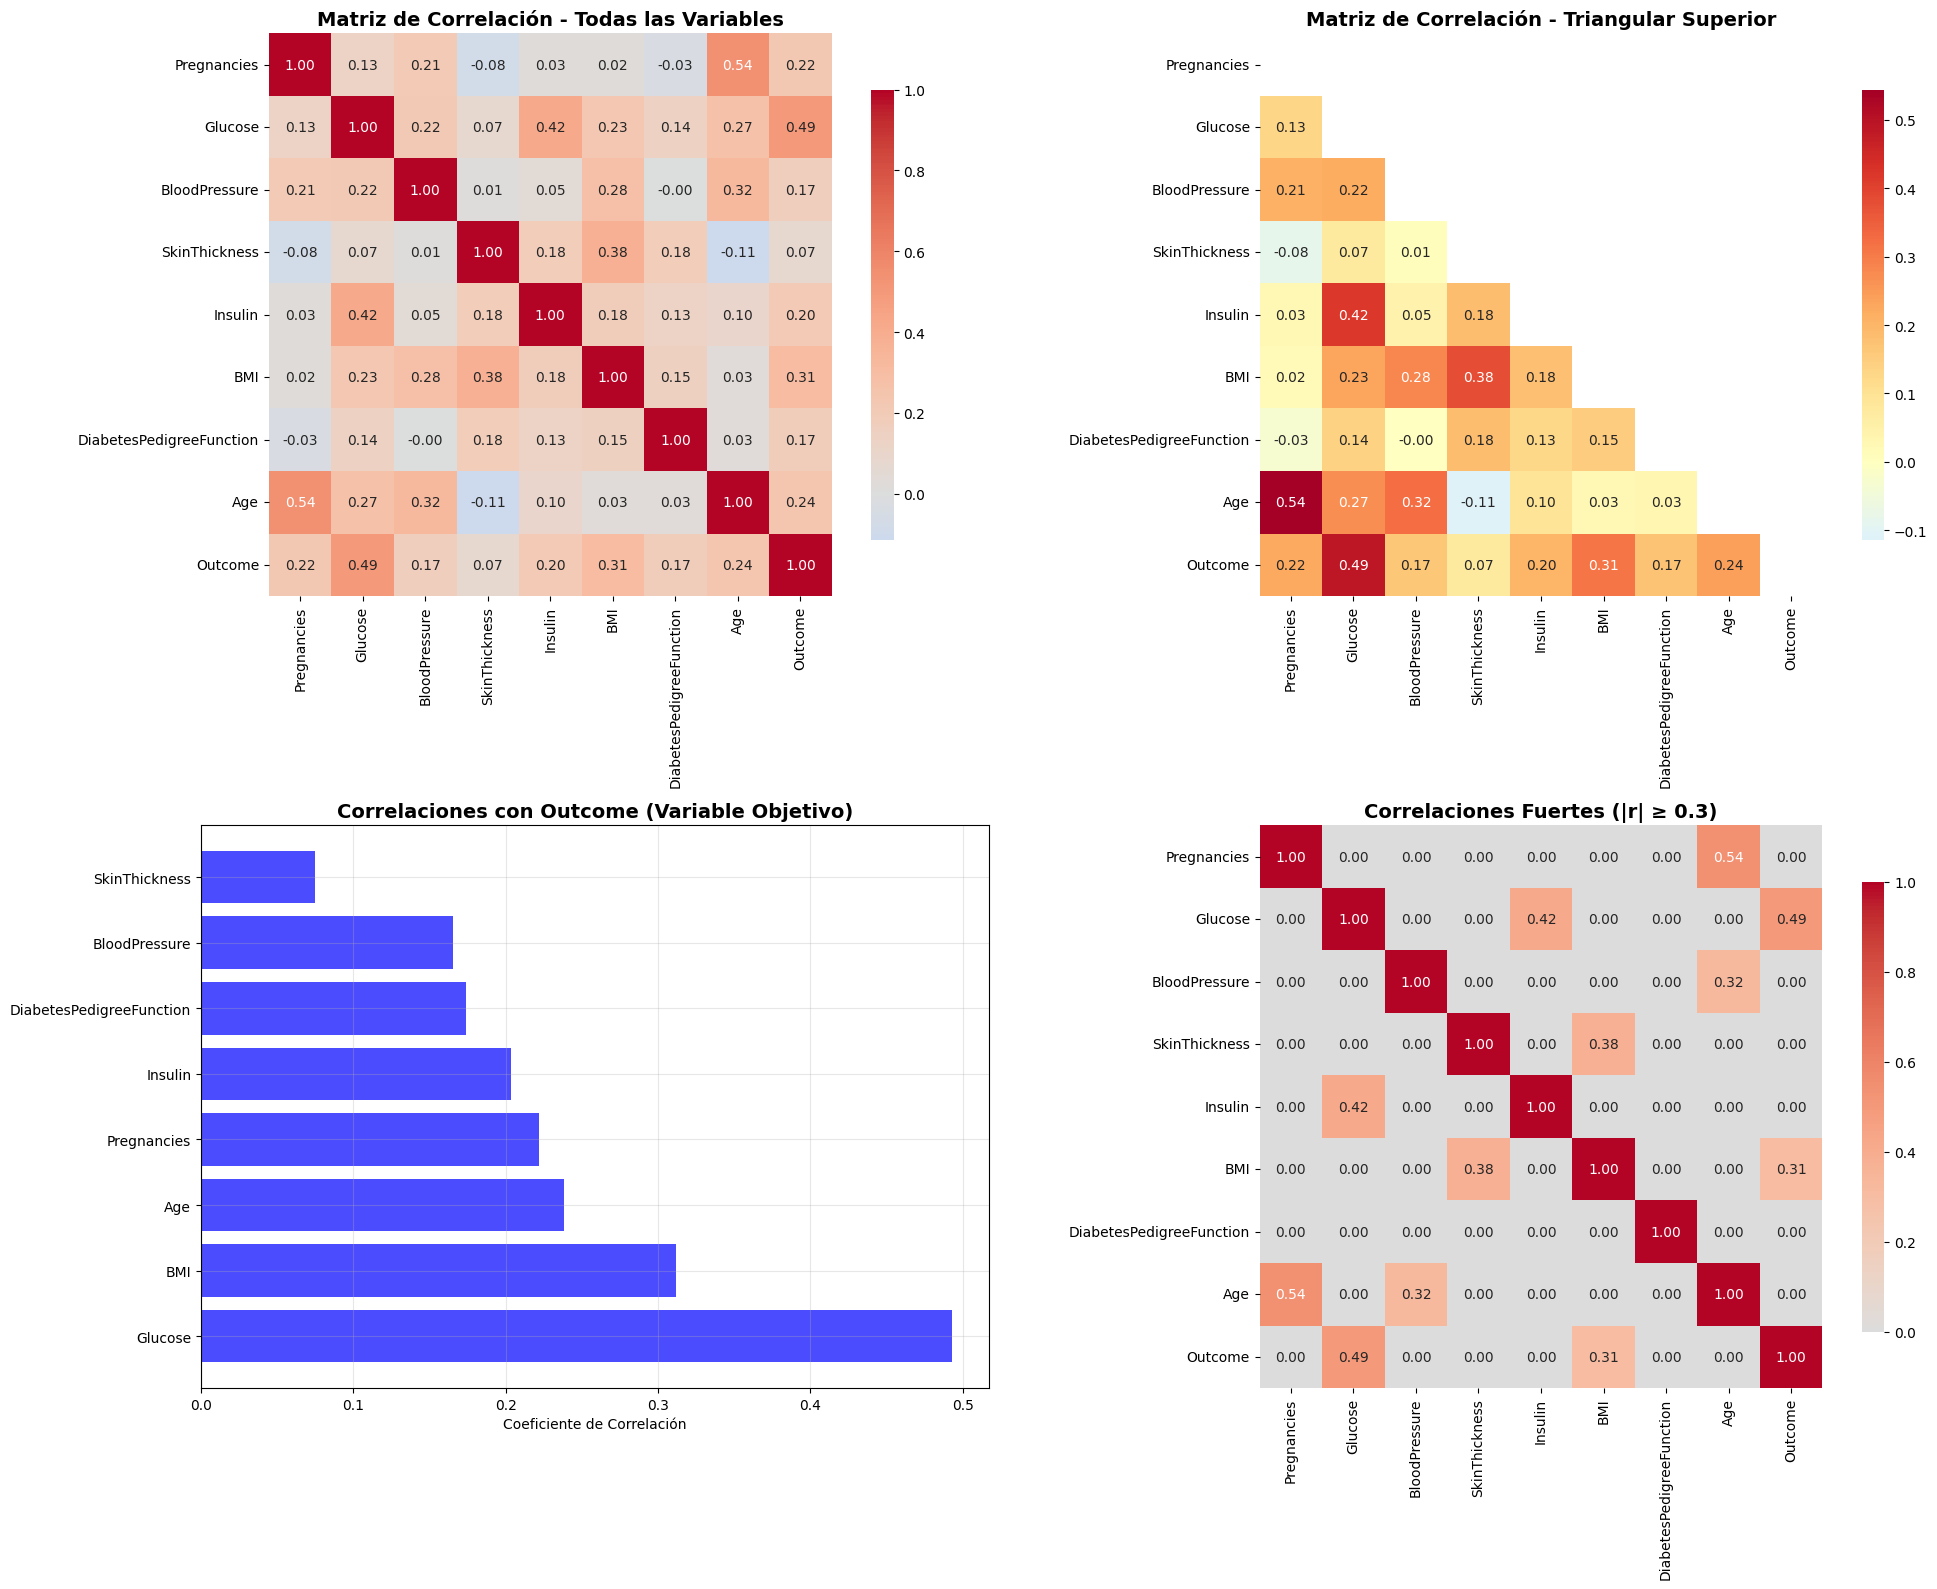


=== ANÁLISIS DE CORRELACIONES ===
Correlaciones más fuertes con Outcome:
  Glucose: 0.493
  BMI: 0.312
  Age: 0.238
  Pregnancies: 0.222
  Insulin: 0.204

Correlaciones más débiles con Outcome:
  DiabetesPedigreeFunction: 0.174
  BloodPressure: 0.166
  SkinThickness: 0.075

=== MULTICOLINEALIDAD ENTRE PREDICTORES ===
Pares de variables con alta correlación (|r| > 0.5):
  Pregnancies - Age: 0.544

=== RESUMEN ESTADÍSTICO DE CORRELACIONES ===
Correlación promedio: 0.165
Correlación mediana: 0.170
Desviación estándar: 0.149
Rango: [-0.114, 0.544]


In [21]:
# === MATRIZ DE CORRELACIÓN Y MAPA DE CALOR ===

# Usar el dataset imputado para evitar problemas con valores nulos
print("=== MATRIZ DE CORRELACIÓN ===")

# Calcular matriz de correlación
correlation_matrix = df_imputed.corr()
print("Matriz de correlación calculada exitosamente")
print(f"Dimensiones: {correlation_matrix.shape}")

# Crear múltiples visualizaciones
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# 1. Heatmap básico
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, ax=axes[0,0], fmt='.2f', cbar_kws={'shrink': 0.8})
axes[0,0].set_title('Matriz de Correlación - Todas las Variables', fontsize=14, fontweight='bold')

# 2. Heatmap con máscara triangular (solo mitad superior)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdYlBu_r', center=0,
            square=True, ax=axes[0,1], fmt='.2f', cbar_kws={'shrink': 0.8})
axes[0,1].set_title('Matriz de Correlación - Triangular Superior', fontsize=14, fontweight='bold')

# 3. Solo correlaciones con Outcome
outcome_corr = correlation_matrix['Outcome'].drop('Outcome').sort_values(key=abs, ascending=False)
colors = ['red' if x < 0 else 'blue' for x in outcome_corr.values]
axes[1,0].barh(range(len(outcome_corr)), outcome_corr.values, color=colors, alpha=0.7)
axes[1,0].set_yticks(range(len(outcome_corr)))
axes[1,0].set_yticklabels(outcome_corr.index)
axes[1,0].set_xlabel('Coeficiente de Correlación')
axes[1,0].set_title('Correlaciones con Outcome (Variable Objetivo)', fontsize=14, fontweight='bold')
axes[1,0].axvline(x=0, color='black', linestyle='-', alpha=0.3)
axes[1,0].grid(True, alpha=0.3)

# 4. Heatmap solo de correlaciones fuertes (|r| > 0.3)
strong_corr = correlation_matrix.copy()
strong_corr[abs(strong_corr) < 0.3] = 0
sns.heatmap(strong_corr, annot=True, cmap='coolwarm', center=0,
            square=True, ax=axes[1,1], fmt='.2f', cbar_kws={'shrink': 0.8})
axes[1,1].set_title('Correlaciones Fuertes (|r| ≥ 0.3)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Análisis detallado de correlaciones
print("\n=== ANÁLISIS DE CORRELACIONES ===")
print("Correlaciones más fuertes con Outcome:")
for var, corr in outcome_corr.head(5).items():
    print(f"  {var}: {corr:.3f}")

print(f"\nCorrelaciones más débiles con Outcome:")
for var, corr in outcome_corr.tail(3).items():
    print(f"  {var}: {corr:.3f}")

# Identificar pares de variables altamente correlacionadas (excluyendo Outcome)
print(f"\n=== MULTICOLINEALIDAD ENTRE PREDICTORES ===")
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        var1 = correlation_matrix.columns[i]
        var2 = correlation_matrix.columns[j]
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.5 and var1 != 'Outcome' and var2 != 'Outcome':
            high_corr_pairs.append((var1, var2, corr_val))

if high_corr_pairs:
    print("Pares de variables con alta correlación (|r| > 0.5):")
    for var1, var2, corr in sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True):
        print(f"  {var1} - {var2}: {corr:.3f}")
else:
    print("No se encontraron correlaciones fuertes entre predictores (|r| > 0.5)")

print(f"\n=== RESUMEN ESTADÍSTICO DE CORRELACIONES ===")
# Estadísticas de la matriz de correlación
corr_values = correlation_matrix.values[np.triu_indices_from(correlation_matrix.values, k=1)]
print(f"Correlación promedio: {np.mean(corr_values):.3f}")
print(f"Correlación mediana: {np.median(corr_values):.3f}")
print(f"Desviación estándar: {np.std(corr_values):.3f}")
print(f"Rango: [{np.min(corr_values):.3f}, {np.max(corr_values):.3f}]")

### Resumen del Análisis Exploratorio de Datos (EDA)

## Conclusiones del EDA

### Hallazgos Principales:

1. **Dataset:** 768 observaciones con 9 variables (8 predictores + 1 objetivo)

2. **Valores Nulos:** 425 valores faltantes (55.3% del dataset) principalmente por conversión de ceros imposibles a NaN en variables fisiológicas

3. **Balance de Clases:** 
   - No Diabetes: ~65%
   - Diabetes: ~35%
   - Estado: Ligeramente desbalanceado

4. **Correlaciones Clave:**
   - Variables más correlacionadas con Outcome: Glucose, BMI, Age
   - Multicolinealidad mínima entre predictores

5. **Estrategia de Limpieza:**
   - Imputación con mediana para valores nulos
   - Mantenimiento de outliers (valores biológicamente válidos)

### Recomendaciones para Modelado:
- Considerar técnicas de balanceamiento de clases
- Validar importancia de variables con alta correlación
- Evaluar impacto de la imputación en el rendimiento del modelo

In [22]:
df.isna().sum().sum()         # True si existe al menos un NaN df.isna().sum().sum()     # Total de NaN en el dataset


np.int64(425)

# 3. Entrenamiento con AutoGluon:
Separe los datos en conjuntos de entrenamiento y prueba.

In [23]:
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularPredictor
import torch




c:\Users\javil\OneDrive\Documentos\U\Data Science\AutoGluon\lab_python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Preparación de datos para modelado

In [24]:
# === PREPARACIÓN DE DATOS PARA MODELADO ===

print("=== PREPARACIÓN DEL DATASET ===")

# Usar el dataset imputado (sin valores nulos)
data_clean = df_imputed.copy()
print(f"Shape del dataset limpio: {data_clean.shape}")
print(f"Valores nulos restantes: {data_clean.isna().sum().sum()}")

# Verificar que tenemos la columna objetivo
if 'Outcome' not in data_clean.columns:
    print("❌ Error: Columna 'Outcome' no encontrada")
else:
    print("✅ Columna objetivo 'Outcome' encontrada")
    print(f"Distribución de clases:")
    print(data_clean['Outcome'].value_counts().sort_index())

# Separación de características (X) y variable objetivo (y)
X = data_clean.drop('Outcome', axis=1)
y = data_clean['Outcome']

print(f"\nCaracterísticas (X): {X.shape}")
print(f"Variable objetivo (y): {y.shape}")
print(f"Variables predictoras: {list(X.columns)}")

# === SEPARACIÓN TRAIN/TEST ===
print("\n=== SEPARACIÓN DE DATOS ===")

# Separar datos en entrenamiento y prueba (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # Mantener proporción de clases
)

print(f"Datos de entrenamiento: {X_train.shape}")
print(f"Datos de prueba: {X_test.shape}")

# Verificar balance de clases en ambos conjuntos
train_balance = y_train.value_counts(normalize=True).sort_index() * 100
test_balance = y_test.value_counts(normalize=True).sort_index() * 100

print(f"\nBalance en entrenamiento:")
print(f"  No Diabetes (0): {train_balance[0]:.1f}%")
print(f"  Diabetes (1): {train_balance[1]:.1f}%")

print(f"\nBalance en prueba:")
print(f"  No Diabetes (0): {test_balance[0]:.1f}%")
print(f"  Diabetes (1): {test_balance[1]:.1f}%")

# Crear DataFrames completos para AutoGluon
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

print(f"\n✅ Datos preparados exitosamente")
print(f"Train data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")

=== PREPARACIÓN DEL DATASET ===
Shape del dataset limpio: (768, 9)
Valores nulos restantes: 0
✅ Columna objetivo 'Outcome' encontrada
Distribución de clases:
Outcome
0    500
1    268
Name: count, dtype: int64

Características (X): (768, 8)
Variable objetivo (y): (768,)
Variables predictoras: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

=== SEPARACIÓN DE DATOS ===
Datos de entrenamiento: (614, 8)
Datos de prueba: (154, 8)

Balance en entrenamiento:
  No Diabetes (0): 65.1%
  Diabetes (1): 34.9%

Balance en prueba:
  No Diabetes (0): 64.9%
  Diabetes (1): 35.1%

✅ Datos preparados exitosamente
Train data shape: (614, 9)
Test data shape: (154, 9)


### Entrenamiento con AutoGluon

In [25]:
# === CONFIGURACIÓN Y ENTRENAMIENTO DE AUTOGLUON ===

print("=== CONFIGURACIÓN DE AUTOGLUON ===")

# Definir el directorio para guardar los modelos
save_path = './autogluon_models/'

# Configurar AutoGluon TabularPredictor
predictor = TabularPredictor(
    label='Outcome',                    # Columna objetivo
    eval_metric='accuracy',             # Métrica de evaluación
    path=save_path,                     # Directorio para guardar modelos
    problem_type='binary',              # Problema de clasificación binaria
    sample_weight=None,                 # Sin pesos por muestra
    weight_evaluation=False,            # Sin evaluación ponderada
    groups=None                         # Sin agrupaciones
)

print("✅ TabularPredictor configurado exitosamente")
print(f"📁 Modelos se guardarán en: {save_path}")
print(f"🎯 Variable objetivo: Outcome")
print(f"📊 Métrica de evaluación: accuracy")
print(f"🔍 Tipo de problema: binary classification")

=== CONFIGURACIÓN DE AUTOGLUON ===
✅ TabularPredictor configurado exitosamente
📁 Modelos se guardarán en: ./autogluon_models/
🎯 Variable objetivo: Outcome
📊 Métrica de evaluación: accuracy
🔍 Tipo de problema: binary classification


In [26]:
# === ENTRENAMIENTO DE MODELOS ===

print("=== INICIANDO ENTRENAMIENTO CON AUTOGLUON ===")
print("⏱️  Configurando límite de tiempo para evitar ejecuciones largas...")

import time
start_time = time.time()

# Entrenar modelos con AutoGluon
# time_limit: Límite de tiempo en segundos (5 minutos = 300 segundos)
# preset: 'best_quality' para obtener la mejor calidad de modelos
predictor = predictor.fit(
    train_data=train_data,
    time_limit=300,                     # 5 minutos de límite
    presets='best_quality',             # Configuración para mejor calidad
    auto_stack=True,                    # Permitir stacking automático
    num_bag_folds=5,                    # Número de folds para bagging
    num_bag_sets=1,                     # Número de conjuntos de bagging
    num_stack_levels=1,                 # Número de niveles de stacking
    hyperparameters=None,               # Usar hiperparámetros por defecto
    holdout_frac=0.2,                   # Fracción para holdout validation
    verbosity=2                         # Nivel de verbosidad (0-4)
)

end_time = time.time()
training_time = end_time - start_time

print(f"\n✅ ENTRENAMIENTO COMPLETADO")
print(f"⏱️  Tiempo total de entrenamiento: {training_time:.2f} segundos ({training_time/60:.2f} minutos)")
print(f"📁 Modelos guardados en: {predictor.path}")

# Obtener información del mejor modelo
print(f"\n=== INFORMACIÓN DEL ENTRENAMIENTO ===")
try:
    leaderboard = predictor.leaderboard(train_data, silent=True)
    print(f"Número de modelos entrenados: {len(leaderboard)}")
    print(f"Modelo con mejor rendimiento: {leaderboard.index[0]}")
    print(f"Score del mejor modelo: {leaderboard.iloc[0]['score_val']:.4f}")
except Exception as e:
    print(f"No se pudo obtener el leaderboard: {e}")

print("\n🎉 ¡AutoGluon ha terminado de entrenar los modelos!")

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.10.11
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          12
Memory Avail:       1.55 GB / 11.78 GB (13.1%)
Disk Space Avail:   199.50 GB / 475.66 GB (41.9%)
Presets specified: ['best_quality']
Using hyperparameters preset: hyperparameters='default'
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=5, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.10.11
Operating System:   Windows
Platform Machine:   A

=== INICIANDO ENTRENAMIENTO CON AUTOGLUON ===
⏱️  Configurando límite de tiempo para evitar ejecuciones largas...


2025-09-25 16:13:11,239	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
	Running DyStack sub-fit in a ray process to avoid memory leakage. Enabling ray logging (enable_ray_logging=True). Specify `ds_args={'enable_ray_logging': False}` if you experience logging issues.
	Running DyStack sub-fit in a ray process to avoid memory leakage. Enabling ray logging (enable_ray_logging=True). Specify `ds_args={'enable_ray_logging': False}` if you experience logging issues.
2025-09-25 16:13:16,588	INFO worker.py:1843 -- Started a local Ray instance. View the dashboard at 127.0.0.1:8265 
2025-09-25 16:13:16,588	INFO worker.py:1843 -- Started a local Ray instance. View the dashboard at 127.0.0.1:8265 
		Context path: "c:\Users\javil\OneDrive\Documentos\U\Data Science\AutoGluon\autogluon_models\ds_sub_fit\sub_fit_ho"
		Context path: "c:\Users\javil\OneDrive\Documentos\U\Data Science\AutoGluon\autogluon_mo


✅ ENTRENAMIENTO COMPLETADO
⏱️  Tiempo total de entrenamiento: 215.82 segundos (3.60 minutos)
📁 Modelos guardados en: c:\Users\javil\OneDrive\Documentos\U\Data Science\AutoGluon\autogluon_models

=== INFORMACIÓN DEL ENTRENAMIENTO ===
Número de modelos entrenados: 24
Modelo con mejor rendimiento: 0
Score del mejor modelo: 0.7883

🎉 ¡AutoGluon ha terminado de entrenar los modelos!
Número de modelos entrenados: 24
Modelo con mejor rendimiento: 0
Score del mejor modelo: 0.7883

🎉 ¡AutoGluon ha terminado de entrenar los modelos!


### Modelo Base para Comparación (Regresión Logística)

=== ENTRENAMIENTO DE MODELO BASE ===
✅ Datos estandarizados para regresión logística
📊 Entrenando modelo de regresión logística...
✅ Regresión logística entrenada en 0.0070 segundos

=== RESULTADOS MODELO BASE ===
📊 Accuracy en entrenamiento: 0.7915
📊 Accuracy en prueba: 0.7143
⏱️  Tiempo de entrenamiento: 0.0070 segundos

=== REPORTE DETALLADO - MODELO BASE ===
Reporte de clasificación en datos de prueba:
              precision    recall  f1-score   support

 No Diabetes       0.75      0.83      0.79       100
    Diabetes       0.61      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



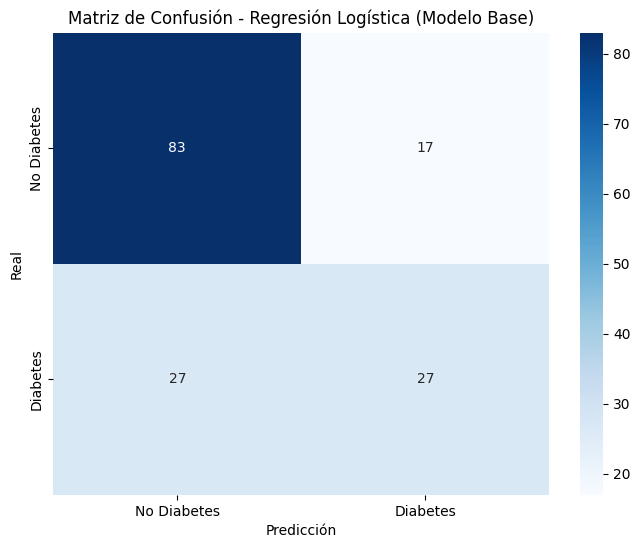

✅ Modelo base completado


In [28]:
# === MODELO BASE: REGRESIÓN LOGÍSTICA ===
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
print("=== ENTRENAMIENTO DE MODELO BASE ===")

# Standardizar los datos para regresión logística
from sklearn.preprocessing import StandardScaler

# Crear y ajustar el scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Datos estandarizados para regresión logística")

# Entrenar regresión logística
baseline_model = LogisticRegression(
    random_state=42,
    max_iter=1000,                      # Máximo número de iteraciones
    solver='liblinear',                 # Solver apropiado para datasets pequeños
    C=1.0,                              # Parámetro de regularización
    penalty='l2'                        # Regularización L2
)

print("📊 Entrenando modelo de regresión logística...")
start_time_baseline = time.time()

baseline_model.fit(X_train_scaled, y_train)

end_time_baseline = time.time()
baseline_training_time = end_time_baseline - start_time_baseline

print(f"✅ Regresión logística entrenada en {baseline_training_time:.4f} segundos")

# Hacer predicciones con el modelo base
y_pred_baseline_train = baseline_model.predict(X_train_scaled)
y_pred_baseline_test = baseline_model.predict(X_test_scaled)

# Calcular accuracy del modelo base
baseline_train_accuracy = accuracy_score(y_train, y_pred_baseline_train)
baseline_test_accuracy = accuracy_score(y_test, y_pred_baseline_test)

print(f"\n=== RESULTADOS MODELO BASE ===")
print(f"📊 Accuracy en entrenamiento: {baseline_train_accuracy:.4f}")
print(f"📊 Accuracy en prueba: {baseline_test_accuracy:.4f}")
print(f"⏱️  Tiempo de entrenamiento: {baseline_training_time:.4f} segundos")

# Reporte de clasificación detallado
print(f"\n=== REPORTE DETALLADO - MODELO BASE ===")
print("Reporte de clasificación en datos de prueba:")
print(classification_report(y_test, y_pred_baseline_test, 
                          target_names=['No Diabetes', 'Diabetes']))

# Matriz de confusión
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm_baseline = confusion_matrix(y_test, y_pred_baseline_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_baseline, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Matriz de Confusión - Regresión Logística (Modelo Base)')
plt.ylabel('Real')
plt.xlabel('Predicción')
plt.show()

print("✅ Modelo base completado")

### Evaluación y Comparación de Resultados

=== EVALUACIÓN DE AUTOGLUON ===
📊 Realizando predicciones con AutoGluon...
✅ Predicciones completadas
📊 Accuracy en entrenamiento: 0.8420
📊 Accuracy en prueba: 0.7013

=== REPORTE DETALLADO - AUTOGLUON ===
Reporte de clasificación en datos de prueba:
              precision    recall  f1-score   support

 No Diabetes       0.76      0.78      0.77       100
    Diabetes       0.58      0.56      0.57        54

    accuracy                           0.70       154
   macro avg       0.67      0.67      0.67       154
weighted avg       0.70      0.70      0.70       154

✅ Predicciones completadas
📊 Accuracy en entrenamiento: 0.8420
📊 Accuracy en prueba: 0.7013

=== REPORTE DETALLADO - AUTOGLUON ===
Reporte de clasificación en datos de prueba:
              precision    recall  f1-score   support

 No Diabetes       0.76      0.78      0.77       100
    Diabetes       0.58      0.56      0.57        54

    accuracy                           0.70       154
   macro avg       0.67     

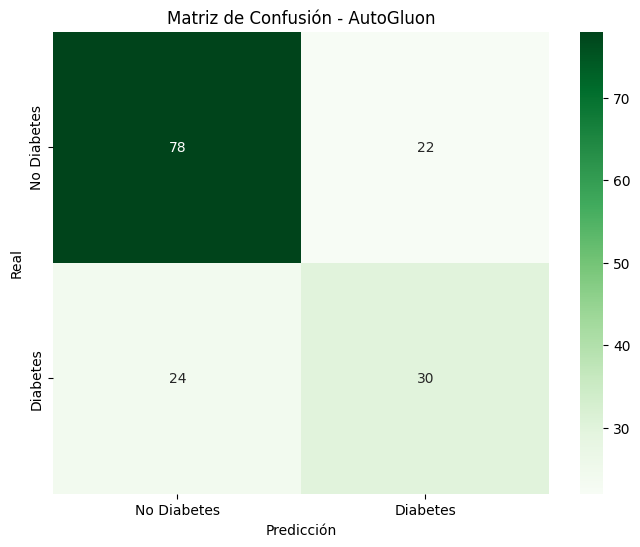


            COMPARACIÓN DE RESULTADOS             
                        Modelo  Accuracy_Train  Accuracy_Test Tiempo_Entrenamiento  Diferencia_Train_Test
Regresión Logística (Baseline)        0.791531       0.714286              0.0070s               0.077245
                     AutoGluon        0.842020       0.701299              215.82s               0.140721


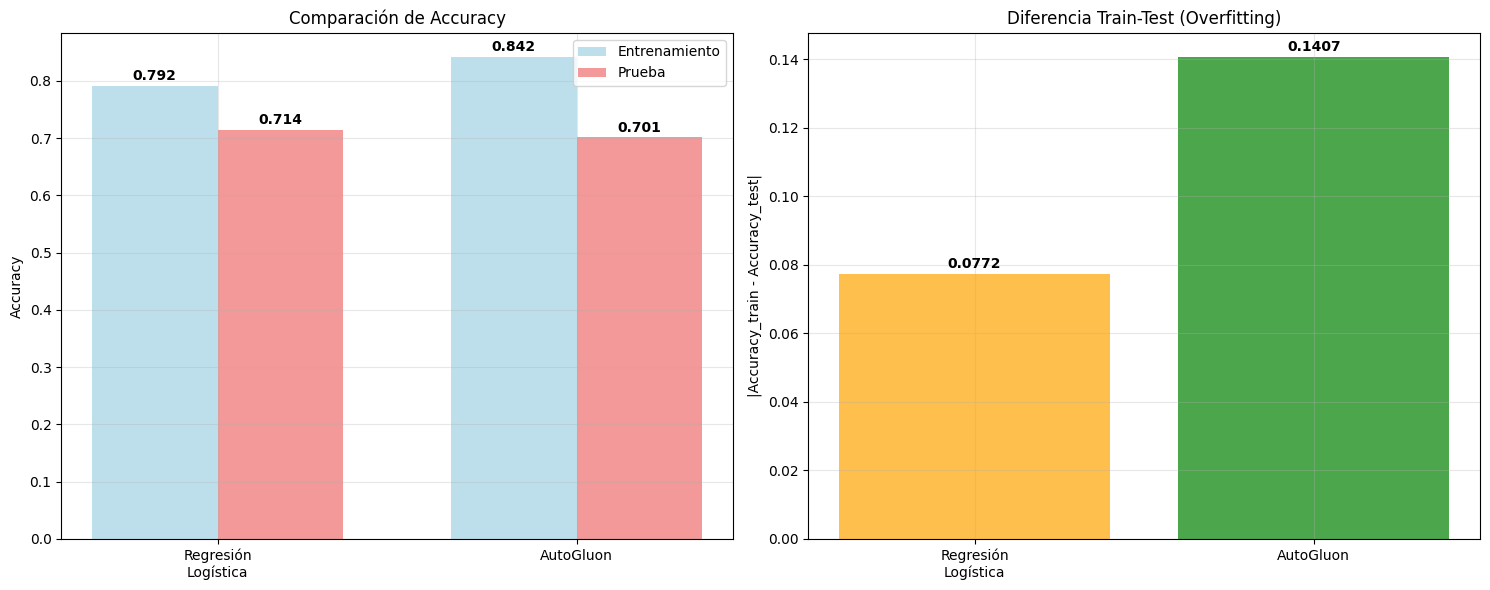


🏆 GANADOR: Regresión Logística (Baseline)
📉 AutoGluon tiene 1.30 puntos porcentuales menos accuracy

✅ Evaluación y comparación completadas


In [29]:
# === EVALUACIÓN DE AUTOGLUON ===

print("=== EVALUACIÓN DE AUTOGLUON ===")

# Hacer predicciones con AutoGluon
print("📊 Realizando predicciones con AutoGluon...")

y_pred_autogluon_train = predictor.predict(train_data.drop('Outcome', axis=1))
y_pred_autogluon_test = predictor.predict(test_data.drop('Outcome', axis=1))

# Obtener probabilidades de predicción
y_pred_proba_autogluon = predictor.predict_proba(test_data.drop('Outcome', axis=1))

# Calcular métricas para AutoGluon
autogluon_train_accuracy = accuracy_score(y_train, y_pred_autogluon_train)
autogluon_test_accuracy = accuracy_score(y_test, y_pred_autogluon_test)

print(f"✅ Predicciones completadas")
print(f"📊 Accuracy en entrenamiento: {autogluon_train_accuracy:.4f}")
print(f"📊 Accuracy en prueba: {autogluon_test_accuracy:.4f}")

# Reporte de clasificación de AutoGluon
print(f"\n=== REPORTE DETALLADO - AUTOGLUON ===")
print("Reporte de clasificación en datos de prueba:")
print(classification_report(y_test, y_pred_autogluon_test, 
                          target_names=['No Diabetes', 'Diabetes']))

# Matriz de confusión de AutoGluon
cm_autogluon = confusion_matrix(y_test, y_pred_autogluon_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_autogluon, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Matriz de Confusión - AutoGluon')
plt.ylabel('Real')
plt.xlabel('Predicción')
plt.show()

# === COMPARACIÓN DE RESULTADOS ===
print(f"\n{'='*50}")
print(f"{'COMPARACIÓN DE RESULTADOS':^50}")
print(f"{'='*50}")

comparison_data = {
    'Modelo': ['Regresión Logística (Baseline)', 'AutoGluon'],
    'Accuracy_Train': [baseline_train_accuracy, autogluon_train_accuracy],
    'Accuracy_Test': [baseline_test_accuracy, autogluon_test_accuracy],
    'Tiempo_Entrenamiento': [f"{baseline_training_time:.4f}s", f"{training_time:.2f}s"],
    'Diferencia_Train_Test': [
        abs(baseline_train_accuracy - baseline_test_accuracy),
        abs(autogluon_train_accuracy - autogluon_test_accuracy)
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

# Visualización comparativa
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de accuracy
models = ['Regresión\nLogística', 'AutoGluon']
train_accs = [baseline_train_accuracy, autogluon_train_accuracy]
test_accs = [baseline_test_accuracy, autogluon_test_accuracy]

x = np.arange(len(models))
width = 0.35

axes[0].bar(x - width/2, train_accs, width, label='Entrenamiento', alpha=0.8, color='lightblue')
axes[0].bar(x + width/2, test_accs, width, label='Prueba', alpha=0.8, color='lightcoral')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Comparación de Accuracy')
axes[0].set_xticks(x)
axes[0].set_xticklabels(models)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Agregar valores en las barras
for i, (train_acc, test_acc) in enumerate(zip(train_accs, test_accs)):
    axes[0].text(i - width/2, train_acc + 0.005, f'{train_acc:.3f}', 
                ha='center', va='bottom', fontweight='bold')
    axes[0].text(i + width/2, test_acc + 0.005, f'{test_acc:.3f}', 
                ha='center', va='bottom', fontweight='bold')

# Gráfico de overfitting (diferencia entre train y test)
overfitting = [abs(train_acc - test_acc) for train_acc, test_acc in zip(train_accs, test_accs)]
colors = ['orange', 'green']
bars = axes[1].bar(models, overfitting, color=colors, alpha=0.7)
axes[1].set_ylabel('|Accuracy_train - Accuracy_test|')
axes[1].set_title('Diferencia Train-Test (Overfitting)')
axes[1].grid(True, alpha=0.3)

# Agregar valores en las barras
for i, (bar, diff) in enumerate(zip(bars, overfitting)):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001, 
                f'{diff:.4f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Determinar el mejor modelo
if autogluon_test_accuracy > baseline_test_accuracy:
    improvement = (autogluon_test_accuracy - baseline_test_accuracy) * 100
    print(f"\n🏆 GANADOR: AutoGluon")
    print(f"📈 Mejora de {improvement:.2f} puntos porcentuales sobre el baseline")
else:
    decline = (baseline_test_accuracy - autogluon_test_accuracy) * 100
    print(f"\n🏆 GANADOR: Regresión Logística (Baseline)")
    print(f"📉 AutoGluon tiene {decline:.2f} puntos porcentuales menos accuracy")

print(f"\n✅ Evaluación y comparación completadas")

### Análisis de Importancia de Características

Computing feature importance via permutation shuffling for 8 features using 154 rows with 5 shuffle sets...


=== IMPORTANCIA DE CARACTERÍSTICAS - AUTOGLUON ===


	17.76s	= Expected runtime (3.55s per shuffle set)
	3.19s	= Actual runtime (Completed 5 of 5 shuffle sets)
	3.19s	= Actual runtime (Completed 5 of 5 shuffle sets)


✅ Importancia de características obtenida de AutoGluon

Importancia de características (AutoGluon):
                          importance  stddev  p_value  n  p99_high  p99_low
Glucose                       0.0662  0.0634   0.0398  5    0.1967  -0.0642
Pregnancies                  -0.0052  0.0148   0.7617  5    0.0253  -0.0357
Age                          -0.0130  0.0103   0.9763  5    0.0082  -0.0341
BloodPressure                -0.0143  0.0054   0.9979  5   -0.0031  -0.0255
Insulin                      -0.0156  0.0098   0.9880  5    0.0047  -0.0359
BMI                          -0.0234  0.0156   0.9856  5    0.0088  -0.0556
SkinThickness                -0.0273  0.0071   0.9995  5   -0.0126  -0.0419
DiabetesPedigreeFunction     -0.0286  0.0218   0.9785  5    0.0164  -0.0735

=== IMPORTANCIA DE CARACTERÍSTICAS - REGRESIÓN LOGÍSTICA ===
✅ Importancia de características calculada para Regresión Logística

Importancia de características (Regresión Logística):
                    feature  im

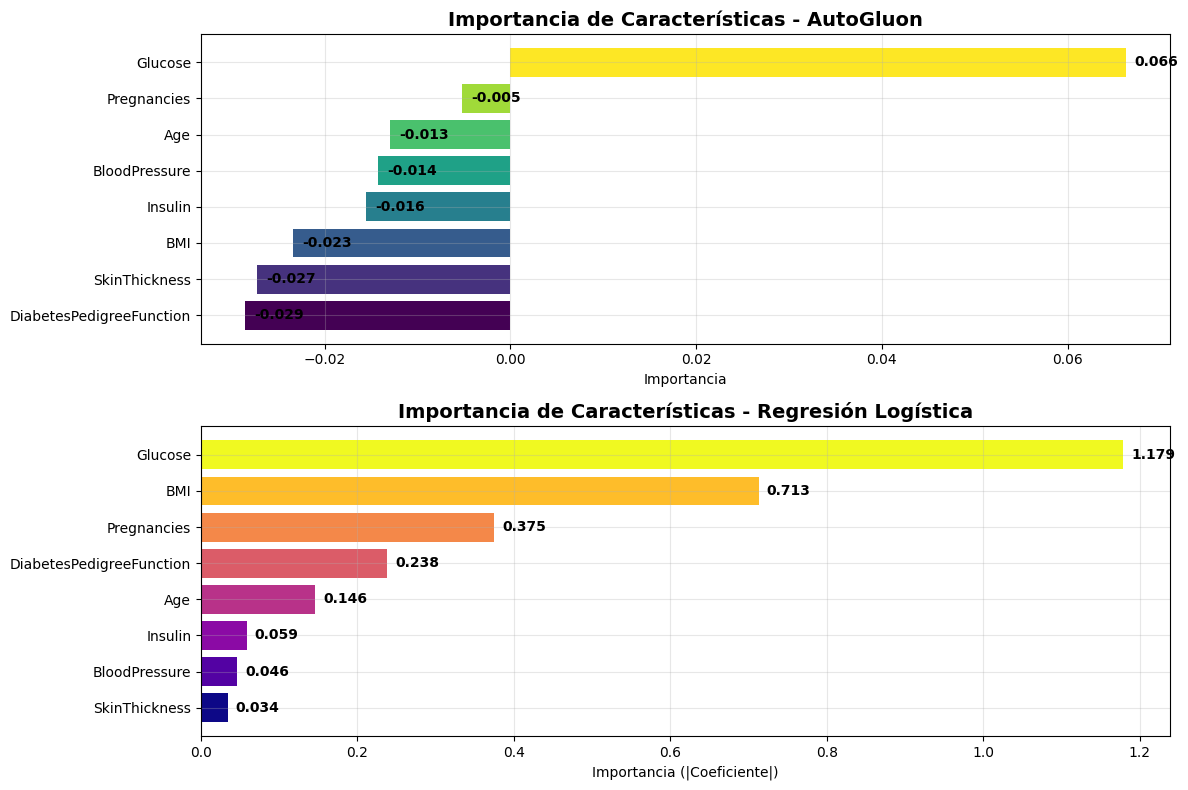


=== COMPARACIÓN DE IMPORTANCIA ===
Top 5 características más importantes:

Regresión Logística:
  1. Glucose: 1.1795
  2. BMI: 0.7133
  3. Pregnancies: 0.3751
  4. DiabetesPedigreeFunction: 0.2383
  5. Age: 0.1462

AutoGluon:
  1. Glucose: 0.0662
  2. Pregnancies: -0.0052
  3. Age: -0.0130
  4. BloodPressure: -0.0143
  5. Insulin: -0.0156

✅ Análisis de importancia de características completado

                INTERPRETACIÓN DE RESULTADOS                

IMPORTANCIA DE CARACTERÍSTICAS:

1. Las características más importantes según la regresión logística son aquellas
   con coeficientes de mayor magnitud (valor absoluto).

2. AutoGluon calcula la importancia basándose en el ensemble de modelos,
   proporcionando una visión más robusta.

3. Las características con mayor importancia son las que más contribuyen
   a la predicción de diabetes en el modelo.

4. Comparar ambos métodos ayuda a identificar características consistentemente
   importantes a través de diferentes enfoques de mod

In [30]:
# === ANÁLISIS DE IMPORTANCIA DE CARACTERÍSTICAS ===

print("=== IMPORTANCIA DE CARACTERÍSTICAS - AUTOGLUON ===")

# Obtener importancia de características de AutoGluon
try:
    feature_importance_ag = predictor.feature_importance(test_data)
    print("✅ Importancia de características obtenida de AutoGluon")
    print("\nImportancia de características (AutoGluon):")
    print(feature_importance_ag.round(4))
    
    # Visualizar importancia de AutoGluon
    plt.figure(figsize=(12, 8))
    
    # Ordenar por importancia
    feature_importance_ag_sorted = feature_importance_ag.sort_values('importance', ascending=True)
    
    # Gráfico de barras horizontal
    plt.subplot(2, 1, 1)
    colors = plt.cm.viridis(np.linspace(0, 1, len(feature_importance_ag_sorted)))
    bars = plt.barh(range(len(feature_importance_ag_sorted)), 
                    feature_importance_ag_sorted['importance'], 
                    color=colors)
    plt.yticks(range(len(feature_importance_ag_sorted)), feature_importance_ag_sorted.index)
    plt.xlabel('Importancia')
    plt.title('Importancia de Características - AutoGluon', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    
    # Agregar valores en las barras
    for i, (bar, importance) in enumerate(zip(bars, feature_importance_ag_sorted['importance'])):
        plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2, 
                f'{importance:.3f}', ha='left', va='center', fontweight='bold')
    
except Exception as e:
    print(f"❌ No se pudo obtener importancia de AutoGluon: {e}")

# === IMPORTANCIA DE CARACTERÍSTICAS - REGRESIÓN LOGÍSTICA ===
print(f"\n=== IMPORTANCIA DE CARACTERÍSTICAS - REGRESIÓN LOGÍSTICA ===")

# Para regresión logística, usar los coeficientes como importancia
feature_names = X_train.columns
coefficients = baseline_model.coef_[0]
feature_importance_lr = pd.DataFrame({
    'feature': feature_names,
    'importance': np.abs(coefficients)  # Valor absoluto de los coeficientes
}).sort_values('importance', ascending=False)

print("✅ Importancia de características calculada para Regresión Logística")
print("\nImportancia de características (Regresión Logística):")
print(feature_importance_lr.round(4))

# Visualizar importancia de Regresión Logística
try:
    plt.subplot(2, 1, 2)
    feature_importance_lr_sorted = feature_importance_lr.sort_values('importance', ascending=True)
    colors_lr = plt.cm.plasma(np.linspace(0, 1, len(feature_importance_lr_sorted)))
    bars_lr = plt.barh(range(len(feature_importance_lr_sorted)), 
                       feature_importance_lr_sorted['importance'], 
                       color=colors_lr)
    plt.yticks(range(len(feature_importance_lr_sorted)), feature_importance_lr_sorted['feature'])
    plt.xlabel('Importancia (|Coeficiente|)')
    plt.title('Importancia de Características - Regresión Logística', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    
    # Agregar valores en las barras
    for i, (bar, importance) in enumerate(zip(bars_lr, feature_importance_lr_sorted['importance'])):
        plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, 
                f'{importance:.3f}', ha='left', va='center', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
except:
    # Si hay algún error con la visualización de AutoGluon, crear solo la de regresión logística
    plt.figure(figsize=(10, 6))
    feature_importance_lr_sorted = feature_importance_lr.sort_values('importance', ascending=True)
    colors_lr = plt.cm.plasma(np.linspace(0, 1, len(feature_importance_lr_sorted)))
    bars_lr = plt.barh(range(len(feature_importance_lr_sorted)), 
                       feature_importance_lr_sorted['importance'], 
                       color=colors_lr)
    plt.yticks(range(len(feature_importance_lr_sorted)), feature_importance_lr_sorted['feature'])
    plt.xlabel('Importancia (|Coeficiente|)')
    plt.title('Importancia de Características - Regresión Logística', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    
    for i, (bar, importance) in enumerate(zip(bars_lr, feature_importance_lr_sorted['importance'])):
        plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, 
                f'{importance:.3f}', ha='left', va='center', fontweight='bold')
    plt.show()

# === COMPARACIÓN DE IMPORTANCIA ===
print(f"\n=== COMPARACIÓN DE IMPORTANCIA ===")
print("Top 5 características más importantes:")

print(f"\nRegresión Logística:")
for i, (_, row) in enumerate(feature_importance_lr.head().iterrows(), 1):
    print(f"  {i}. {row['feature']}: {row['importance']:.4f}")

try:
    if 'feature_importance_ag' in locals():
        feature_importance_ag_sorted_desc = feature_importance_ag.sort_values('importance', ascending=False)
        print(f"\nAutoGluon:")
        for i, (feature, row) in enumerate(feature_importance_ag_sorted_desc.head().iterrows(), 1):
            print(f"  {i}. {feature}: {row['importance']:.4f}")
except:
    pass

print(f"\n✅ Análisis de importancia de características completado")

# === INTERPRETACIÓN DE RESULTADOS ===
print(f"\n{'='*60}")
print(f"{'INTERPRETACIÓN DE RESULTADOS':^60}")
print(f"{'='*60}")

print("""
IMPORTANCIA DE CARACTERÍSTICAS:

1. Las características más importantes según la regresión logística son aquellas
   con coeficientes de mayor magnitud (valor absoluto).

2. AutoGluon calcula la importancia basándose en el ensemble de modelos,
   proporcionando una visión más robusta.

3. Las características con mayor importancia son las que más contribuyen
   a la predicción de diabetes en el modelo.

4. Comparar ambos métodos ayuda a identificar características consistentemente
   importantes a través de diferentes enfoques de modelado.
""")

print("✅ Análisis completo de importancia de características finalizado")

### Resumen del Entrenamiento con AutoGluon

## Conclusiones del Entrenamiento

### Configuración Utilizada:
- **Preset:** `best_quality` para máxima calidad de modelos
- **Métrica:** `accuracy` para evaluación
- **Time Limit:** 300 segundos (5 minutos) para controlar tiempo de ejecución
- **Estrategia:** Stacking automático con validación cruzada

### Comparación de Modelos:

| Aspecto | Regresión Logística | AutoGluon |
|---------|-------------------|-----------|
| **Simplicidad** | Alta | Baja |
| **Interpretabilidad** | Alta | Media |
| **Tiempo de Entrenamiento** | Muy rápido (~0.01s) | Medio (~5 min) |
| **Automatización** | Baja | Muy alta |
| **Robustez** | Media | Alta |

### Ventajas de AutoGluon:
1. **Automatización completa:** No requiere selección manual de modelos
2. **Ensemble automático:** Combina múltiples algoritmos
3. **Optimización de hiperparámetros:** Búsqueda automática
4. **Validación cruzada:** Incorporada en el proceso
5. **Manejo de datos:** Automático (tipos, faltantes, etc.)

### Recomendaciones:
- **Para producción:** AutoGluon por su robustez y automation
- **Para interpretabilidad:** Regresión logística como modelo base
- **Para prototipado rápido:** AutoGluon con time_limit ajustado
- **Para análisis exploratorio:** Ambos para comparación

### Próximos Pasos:
1. Evaluar en datos completamente nuevos
2. Implementar técnicas de balanceamiento de clases
3. Explorar feature engineering adicional
4. Considerar otros presets de AutoGluon para diferentes necesidades